<center>
<h4>Diplomatura en CDAAyA 2020 - FaMAF - UNC</h4>
<h1>¿Caro o Barato? Análisis de Precios de Almacen en un Contexto Inflacionario</h1>
<h3>Exploración y Curación</h3>
</center>
</left>
<h4>Sofía Luján y Julieta Bergamasco</h4>
</left>

__[Proyecto para Mentoría](https://sites.google.com/view/mentorias2020-diplodatos/caro-o-barato-an%C3%A1lisis-de-precios-de-almac%C3%A9n-en-un-contexto-inflacionari?authuser=0)__


### Introducción

En la siguiente notebook, se presentará la consigna a seguir para el segundo práctico de la materia Exploración y Curación. El objetivo consiste en identificar e implementar los pasos necesarios para la limpieza de la base de datos, así como también analizar cruces de datos con mayor profundidad y validando el sentido lógico. Para ello, comenzaremos con las importaciones pertinentes.

### Importaciones

In [ ]:
##from google.colab import drive
##drive.mount('/content/drive')

In [ ]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
from io import StringIO
# Puede que nos sirvan también
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import re

In [ ]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

## Consigna para Curación y Exploración del Dataset

### I. Rutina de Curación

Inicialmente, con el objetivo de preparar los datos que alimentarán futuros modelos de aprendizaje automático (ML), se propone seguir la siguiente __[checklist](https://dimewiki.worldbank.org/wiki/Checklist:_Data_Cleaning)__ para la limpieza de los datos de nuestro proyecto. Esta _checklist_ es la misma que utilizaron en el primer práctico de la materia y nos será de utilidad como guía para curar el dataset. A modo de ayuda, **en esta notebook encontrarán una especie de template** que sigue la _checklist_ y que deberán ir completando. **Cada decisión tomada deberá quedar registrada de manera explícita y clara.**

A los fines de realizar este práctico, se utilizará el dataset original. Es decir, por un lado, los 5 archivos de precios (que sí podemos unirlos para hacer la limpieza, ya que tienen la misma estructura), y, por otro lado, el txt de sucursales y el txt de productos. Cerca del final del procesamiento, se realizará el mismo join aplicado para obtener el dataset completo, con la misma estructura que el que utilizaron en el práctico de A&V. Además, se crearán nuevas features cuando lo consideren pertinente.

Recuerden que la ciencia de datos es un **proceso circular y continuo, no lineal**. Es decir, si los datos requieren de mayor procesamiento para satisfacer las necesidades de algoritmos de ML (cualesquiera de ellos), vamos a volver a la etapa inicial para, por ejemplo, crear nuevas features, tomar decisiones diferentes sobre valores faltantes o valores atípicos (outliers), descartar features, entre otras.

II. Análisis en Profundidad del Contenido

Una vez aplicada la _Checklist_, lo que vamos a hacer es profundizar aún más el análisis y tomar decisiones que se consideren pertinentes, si es que no lo han hecho aún en el desarrollo del primer apartado. Por supuesto, se deberán registrar todas las decisiones que tomen al respecto.

Al finalizar con el práctico, las preguntas o consignas listadas a continuación deberán quedar respondidas, mientras que si ya lo hicieron durante el desarrollo de la _checklist_, el objetivo es que se replanteen las decisiones tomadas al respecto:

1. Todas las variables tienen el tipo apropiado? Analizar las features con tipo `Objeto`. Qué decisiones tomarán al respecto?

2. Todos los `producto_id` en el dataset de precios se encuentran en la entidad de productos? Tomamos decisiones al respecto?

3. Todos los `sucursal_id` en el dataset de precios se encuentran en la entidad de sucursales? Tomamos decisiones al respecto?

4. Cuántos precios reporta cada sucursal? Todas las sucursales reportan precios en todas las fechas?

Gran parte (la mayoría) de las variables del dataset son categóricas y podemos trabajar muchas features antes de unir los datos.

5. En el dataset de **productos**:

    5.1. `presentacion`: a partir de esta característica, crear nuevas columnas que separen `cantidad` y `um`. Homogeneizar unidades de medida, al máximo posible, y crear nueva columna para indicar `um_homogenea` y el `factor` que sería necesario para homogeneizar el precio de esa presentación. A partir de `um_homogenea`, crear variables dummies (_Tip: Pueden usar pd.get_dummies()_).

    5.2. `nombre`: crear una nueva columna con el `nombre_depurado`. Esto es, llevar todo a minúsculas, quitar signos de puntuación, quitar unidad de medida, identificar dígitos numéricos. Utilizando esta columna, `nombre_depurado`, tokenizar los nombres y obtener las palabras más fecuentes. Eliminar palabras muy frecuentes en nombres que no nos dicen nada (‘de’, ‘en’, ‘con’, ‘para’, ‘la’, ‘el’, ‘&’, etc.). Convertir las **n** palabras más frecuentes en dummies. **n** es una decisión que deberán adoptar (_Tip: Pueden usar Series.str.find()_). Evaluar la posibilidad de crear una dummy `otras_palabras`, para aquellos nombres que contienen palabras poco frecuentes no incluidas.

    5.3. `marca`: obtener las **n** marcas más frecuentes y crear un nuevo campo 'marca_frecuente' que tenga la marca original si es de las más frecuentes y la categoría `OTRA` para aquellas menos frecuentes. Crear dummies a partir de este campo. _(Una opción viable podría ser unir el nombre con la marca en un campo y luego depurar las palabras duplicadas que queden en el nombre+marca. Cualquier otra técnica que se les ocurra puede ser válida)_

6. En el dataset de **sucursales**:

    6.1. `provincia` o `nom_provincia`: a partir de esta característica, crear las variables dummies correspondientes.

    6.2. `tipoSucursal`: a partir de esta característica, crear las variables dummies correspondientes.

    6.3. `banderaDescripcion`: a partir de esta característica, crear las variables dummies correspondientes. La misma descripción de sucursal tiene siempre el mismo tipo? En qué afecta esto?

7. Unir los precios con las entidades de productos y sucursales para obtener un dataset unificado y limpio. A partir del `precio` y del `factor`, crear el `precio_homogeneo`. **Volver a analizar outliers.**

8. Crear el `precio_relativo`, de acuerdo al producto seleccionado y la metodología implementada en el práctico de A&V.

Esta lista es extensa e intenta abarcar todas las posibles irregularidades en los datos, pero puede no ser exhaustiva. **Cualquier análisis adicional de consistencia que deseen agregar porque lo consideran pertinente, será bienvenido y valorado.**

Luego de pasar por todos los puntos de la _checklist_ propuesta y las consignas, deberán **almacenar en un nuevo archivo los datos resultantes luego de hacer los joins correspondientes**.

### Entregables

Los entregables de este práctico consisten en:
- **Esta misma Notebook, pero con la _checklist_ aplicada y el análisis de contenido completo**, explicando las decisiones tomadas en cada etapa.
- Además, deberán elaborar un **script** que contenga una función (o varias) para curar nuevos datos con la misma estructura.
- Finalmente, resumir las principales decisiones y conclusiones en un **documento de texto** (como para ir completando el informe, que formará parte de la presentación final).

**Fecha de Entrega: 27/07**

# Resolución

## I. Rutina de Curación

### 1. Importación de Datos

#### 1.1. Verificación de Inexistencia de Problemas en la Importación

Para comenzar, importamos los datos que vamos a procesar:

In [ ]:
# Por un lado, cargamos los precios y los unimos en un único dataframe


precios_20200412_20200413 = pd.read_csv('https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/precios_20200412_20200413.csv')
precios_20200419_20200419 = pd.read_csv('https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/precios_20200419_20200419.csv')
precios_20200426_20200426 = pd.read_csv('https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/precios_20200426_20200426.csv')
precios_20200502_20200503 = pd.read_csv('https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/precios_20200502_20200503.csv')
precios_20200518_20200518 = pd.read_csv('https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/precios_20200518_20200518.csv')

lista_df_px = [precios_20200412_20200413, precios_20200419_20200419, precios_20200426_20200426,
 precios_20200502_20200503, precios_20200518_20200518]
fecha_px = ['20200412', '20200419', '20200426', '20200502', '20200518']

precios = pd.DataFrame()
for df, fecha in zip(lista_df_px, fecha_px):
  df['fecha'] = fecha
  precios = pd.concat([precios,df])

precios.head()

,precio,producto_id,sucursal_id,fecha
0,29.90,0000000001663,2-1-014,20200412
1,29.90,0000000002288,2-1-032,20200412
2,39.90,0000000002288,2-1-096,20200412
3,499.99,0000000205870,9-1-686,20200412
4,519.99,0000000205870,9-2-248,20200412


In [ ]:
precios.shape

In [ ]:
##Con esto compruebo que tengo la misma cantidad de registros en cada columna que  tengo 71723 productos, 5 fechas y 513 sucursales utilizadas en estas fechas.
precios.describe(include=['object'])

,producto_id,sucursal_id,fecha
count,2222418,2222418,2222418
unique,71723,513,5
top,7793100111563,49-1-2,20200426
freq,545,75516,478909


In [ ]:
# Cargamos los txt de productos y sucursales, para tener la información de cada campo
producto_url = 'https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/productos.csv'
productos = pd.read_csv(producto_url)
sucursal_url = 'https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/sucursales.csv'
sucursales = pd.read_csv(sucursal_url)

In [ ]:
# A las sucursales, le agregamos la descripción de la provincia y la región
provincia_txt = """
provincia	nom_provincia	region
AR-A	Salta	Norte Grande
AR-B	Provincia de Buenos Aires	Centro
AR-C	Ciudad Autónoma de Buenos Aires	Centro
AR-D	San Luis	Cuyo
AR-E	Entre Ríos	Centro
AR-F	La Rioja	Cuyo
AR-G	Santiago del Estero	Norte Grande
AR-H	Chaco	Norte Grande
AR-J	San Juan	Cuyo
AR-K	Catamarca	Norte Grande
AR-L	La Pampa	Centro
AR-M	Mendoza	Cuyo
AR-N	Misiones	Norte Grande
AR-P	Formosa	Norte Grande
AR-Q	Neuquén	Patagonia
AR-R	Río Negro	Patagonia
AR-S	Santa Fe	Centro
AR-T	Tucumán	Norte Grande
AR-U	Chubut	Patagonia
AR-V	Tierra del Fuego	Patagonia
AR-W	Corrientes	Norte Grande
AR-X	Córdoba	Centro
AR-Y	Jujuy	Norte Grande
AR-Z	Santa Cruz	Patagonia
"""
provincia_csv = StringIO(provincia_txt)
entidad_provincia = pd.read_csv(provincia_csv, sep=('\t'))
sucursales = sucursales.merge(entidad_provincia, on = 'provincia')

In [ ]:
sucursales.head()

,id,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region
0,1-1-7,1,1,Super MAMI,Dinosaurio S.A.,AR-X,SALSIPUEDES,E53 1011 None,-31.126667,-64.295250,Super Mami 4,Hipermercado,Córdoba,Centro
1,10-1-24,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Jardin Espinoza,Av. O'Higgins 3765,-31.455534,-64.166095,Córdoba Jardín,Hipermercado,Córdoba,Centro
2,10-1-50,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Quintas de Arguello,Recta Martinolli 7850,-31.346646,-64.269297,Córdoba Recta Martinolli,Hipermercado,Córdoba,Centro
3,10-1-54,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Villa Allende Lomas,Av. Río De Janeiro 1787,-31.300019,-64.276462,Córdoba Villa Allende,Hipermercado,Córdoba,Centro
4,10-1-9,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Villa Urquiza,Av. Colón 4880,-31.393915,-64.242835,Córdoba Colon,Hipermercado,Córdoba,Centro


In [ ]:
sucursales.shape

(2333, 14)

Tomamos una muestra aleatoria para ver valores más dispersos.

**set de datos de productos**

In [ ]:
productos.head()

,id,marca,nombre,presentacion,categoria1,categoria2,categoria3
0,0000000001663,LA ANÓNIMA,Radicheta Atada La Anonima 1 Un,1.0 un,NaN,NaN,NaN
1,0000000002288,LA ANÓNIMA,Perejil Atado La Anonima 1 Un,1.0 un,NaN,NaN,NaN
2,0000000205870,SIN MARCA,Ojo de Bife 1 Kg,1.0 kg,NaN,NaN,NaN
3,0000000205894,SIN MARCA,Milanesa de Peceto Novillito 1 Kg,1.0 kg,NaN,NaN,NaN
4,0000000205955,SIN MARCA,Chiquizuela Novillito 1 Kg,1.0 kg,NaN,NaN,NaN


In [ ]:
# Fijar seed para asegurar reproducibilidad
np.random.seed(0)
productos.sample(5)

,id,marca,nombre,presentacion,categoria1,categoria2,categoria3
4441,10-3-2302046000005,SIN MARCA,Picada Comun 1 Kg,1.0 kg,NaN,NaN,NaN
35358,7791351130906,EL PEONCITO,Mix Frutas Secas El Peoncito 250 Gr,250.0 gr,NaN,NaN,NaN
23477,7790360967824,SWIFT,Milanesa de Soja Prefrita Swift 4 Un,4.0 un,NaN,NaN,NaN
49260,7794980938240,YUSPE,Condimento para Arroz Yuspe 25 Gr,25.0 gr,NaN,NaN,NaN
4231,10-2-2308124000004,SIN MARCA,Papa Negra 1 Kg,1.0 kg,NaN,NaN,NaN


In [ ]:
##Algunos id de productos tienen guiones y otros no. Hay que tenerlo en cuenta cuando se analice el dataset de precios.
productos[productos['id'].str.contains('-')]

,id,marca,nombre,presentacion,categoria1,categoria2,categoria3
1922,1-1-1500210000009,LA SERENÍSIMA,Queso Cremon Light La Serenisima 1 Kg,1.0 kg,NaN,NaN,NaN
1923,1-1-2270004000001,LA SERENÍSIMA,Queso Port Salut Fraccionado La Serenisima 1 Kg,1.0 kg,NaN,NaN,NaN
1924,1-1-2270005000000,LA SERENÍSIMA,Queso Port Salut con Probioticos Fraccionado La Serenisima 1 Kg,1.0 kg,NaN,NaN,NaN
1925,1-1-2270006000009,LA SERENÍSIMA,Queso Gouda con Vitamina A y D La Serenisima 1 Kg,1.0 kg,NaN,NaN,NaN
1926,1-1-2270008000007,LA SERENÍSIMA,Queso Mini Fynbo La Serenisima 1 Kg,1.0 kg,NaN,NaN,NaN
...,...,...,...,...,...,...,...
72012,9-3-0000000994002,SIN MARCA,Tapa de Asado Carne Vacuna en Bandeja 1 Kg,1.0 kg,NaN,NaN,NaN
72013,9-3-0000000995696,PAMPA CHEESE,Queso Mozzarella en Sobre Pampa Cheese 1 Kg,1.0 kg,NaN,NaN,NaN
72014,9-3-0000000997096,SIN MARCA,Alas de Pollo 1 Kg,1.0 kg,NaN,NaN,NaN
72015,9-3-0000000997126,SIN MARCA,Carne Comun Molida Novillo 1 Kg,1.0 kg,NaN,NaN,NaN


In [ ]:
##hay dos id que no tienen marca ni presentacion ni nada
productos.describe(include=['object'])

,id,marca,nombre,presentacion,categoria1,categoria2,categoria3
count,72038,72036,72036,72036,4,4,4
unique,72038,5653,63896,1168,3,3,4
top,7798127970056,SIN MARCA,Mollejas 1 Kg,1.0 kg,Almacén,Aceites,Acondicionadores
freq,1,8649,26,12894,2,2,1


**set de datos de sucursales** 

In [ ]:
np.random.seed(0)
sucursales.sample(5)

,id,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region
1147,13-1-129,13,1,Cooperativa Obrera Limitada de Consumo y Vivienda,Cooperativa Obrera Limitada de Consumo y Vivienda,AR-Q,Las Lajas,Saavedra 360,-38.525522,-70.362694,Las Lajas,Supermercado,Neuquén,Patagonia
2324,11-2-1099,11,2,Changomas,Wal Mart Argentina S.R.L.,AR-N,POSADAS,Avenida Cabo De Hornos 4130,-27.425611,-55.933212,Posadas II,Hipermercado,Misiones,Norte Grande
655,15-1-62,15,1,Supermercados DIA,DIA Argentina S.A,AR-B,Monte Grande,Cl Vicente Lopez 844,-34.819809,-58.467399,62 - Monte Grande,Autoservicio,Provincia de Buenos Aires,Centro
868,9-1-51,9,1,Vea,Jumbo Retail Argentina S.A.,AR-B,NECOCHEA,Av. 59 Esq. Calle 38 1660,-38.561100,-58.730500,NECOCHEA,Supermercado,Provincia de Buenos Aires,Centro
1426,10-3-364,10,3,Express,INC S.A.,AR-C,Ciudad Autónoma de Buenos Aires,Ciudad De La Paz 353,-34.573878,-58.442051,Ciudad de la Paz 353,Autoservicio,Ciudad Autónoma de Buenos Aires,Centro


In [ ]:
##tengo 2333 casos unicos de id de sucursal
sucursales.describe(include=['object'])

,id,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,sucursalNombre,sucursalTipo,nom_provincia,region
count,2333,2333,2333,2333,2333,2333,2333,2333,2333,2333
unique,2333,45,34,24,674,2331,2241,4,24,4
top,15-1-190,Supermercados DIA,DIA Argentina S.A,AR-C,Capital Federal,Sarmiento 0,JOSIMAR,Autoservicio,Ciudad Autónoma de Buenos Aires,Centro
freq,1,644,644,816,350,3,8,1052,816,1873


**set de datos de precios** 

In [ ]:
np.random.seed(0)
precios.sample(5)

,precio,producto_id,sucursal_id,fecha
20284,42.90,2920177000000,10-1-33,20200419
10867,279.99,0754697468949,12-1-215,20200419
321817,219.00,7793008015987,50-1-2,20200412
202918,66.00,7790895009846,10-3-442,20200419
41595,349.00,7506195196694,10-1-235,20200502


In [ ]:
##de los 2333 casos que hay en el dataset de sucursales se reportan 513
precios.describe(include=['object'])

,producto_id,sucursal_id,fecha
count,2222418,2222418,2222418
unique,71723,513,5
top,7793100111563,49-1-2,20200426
freq,545,75516,478909


In [ ]:
##hay 64306 registros con este formato en productos_id
precios[precios['producto_id'].str.contains('-')]

,precio,producto_id,sucursal_id,fecha
11540,59.00,10-1-2300073000005,10-1-25,20200412
11541,7.49,10-1-2300073000005,10-1-48,20200412
11542,59.00,10-1-2300075000003,10-1-25,20200412
11543,279.90,10-1-2300160000000,10-1-8,20200412
11544,1274.00,10-1-2300175000002,10-1-6,20200412
...,...,...,...,...
414957,409.00,9-3-0000000994002,9-3-5222,20200518
414958,509.00,9-3-0000000995696,9-3-5205,20200518
414959,114.99,9-3-0000000997096,9-3-5251,20200518
414960,219.00,9-3-0000000997126,9-3-5222,20200518


Veamos los tipos de datos que tenemos

In [ ]:
precios.dtypes

precio         float64
producto_id     object
sucursal_id     object
fecha           object
dtype: object

In [ ]:
sucursales.dtypes

id                      object
comercioId               int64
banderaId                int64
banderaDescripcion      object
comercioRazonSocial     object
provincia               object
localidad               object
direccion               object
lat                    float64
lng                    float64
sucursalNombre          object
sucursalTipo            object
nom_provincia           object
region                  object
dtype: object

In [ ]:
productos.dtypes

id              object
marca           object
nombre          object
presentacion    object
categoria1      object
categoria2      object
categoria3      object
dtype: object

Los datasets ya están **listos para trabajar!**

#### 1.2. Asegurar la Existencia de IDs o Claves Únicas

El siguiente paso implica chequear que no existen datos duplicados y que las claves, si existen, son únicas.

Esto debemos hacerlo sobre las **entidades de sucursales y de productos**. Deberíamos tener un único id por producto o sucursal en estos ficheros, respectivamente. 

In [ ]:
sucursales.shape

(2333, 14)

In [ ]:
##veo si hay duplicados en el archivo de sucursales
sucursales[sucursales.duplicated()]

,id,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region


In [ ]:
##no hay duplicados por id
sucursales[sucursales.duplicated(subset=['id'], keep=False)].sort_values(['id'])

,id,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region


In [ ]:
productos.shape

(72038, 7)

In [ ]:
##veo si hay duplicados en el archivo de productos por su id

productos[productos.duplicated()]

,id,marca,nombre,presentacion,categoria1,categoria2,categoria3


In [ ]:
##################
###
# Para el set de datos de precios no hay que tenerlo en cuenta porque se sobreentiende que hay duplicados
###
##################

#### 1.3. Despersonalizar Datos y Guardarlos en un Nuevo Archivo

En este caso, no es necesario despersonalizar ningún dato, dado que los mismos no incluyen información sensible.
En todo caso, nos interesan las sucursales y sus direcciones.

#### 1.4. Nunca Modificar los Datos Crudos u Originales

Al finalizar la limpieza, deberán guardar el dataset resultante, para asegurarse de no modificar los datos originales.

### 2. Pasos de Limpieza Necesarios

#### 2.1. Etiquetas de Variables/Columnas y Problemas de Codificación/Encoding

Antes que nada, verificar el encoding de la fuente de datos, leyendo en crudo los primeros 100000 caracteres, por ejemplo:

In [ ]:
import chardet

In [ ]:
import requests
rawdata = requests.get(producto_url)
result = chardet.detect(rawdata.content[:100000])
result

{'confidence': 0.99, 'encoding': 'utf-8', 'language': ''}

Analizar los nombres de columnas, utilizando por ejemplo `df.columns.str.extract(r'^(\w+)$')`.

In [ ]:
precios.columns.values

array(['precio', 'producto_id', 'sucursal_id', 'fecha'], dtype=object)

In [ ]:
precios.columns.str.extract(r'^(\w+)$')

,0
0,precio
1,producto_id
2,sucursal_id
3,fecha


In [ ]:
productos.columns.values

array(['id', 'marca', 'nombre', 'presentacion', 'categoria1',
       'categoria2', 'categoria3'], dtype=object)

In [ ]:
productos.columns.str.extract(r'^(\w+)$')

,0
0,id
1,marca
2,nombre
3,presentacion
4,categoria1
5,categoria2
6,categoria3


In [ ]:
sucursales.columns.values

array(['id', 'comercioId', 'banderaId', 'banderaDescripcion',
       'comercioRazonSocial', 'provincia', 'localidad', 'direccion',
       'lat', 'lng', 'sucursalNombre', 'sucursalTipo', 'nom_provincia',
       'region'], dtype=object)

In [ ]:
sucursales.columns.str.extract(r'^(\w+)$')

,0
0,id
1,comercioId
2,banderaId
3,banderaDescripcion
4,comercioRazonSocial
5,provincia
6,localidad
7,direccion
8,lat
9,lng


#### 2.2. Tratamiento de Valores Faltantes

Para analizar los valores faltantes, primero deberán saber cuántos existen por campo y cuánto representan del total. Por ejemplo, para el dataset de precios:

**set de datos de precios**

In [ ]:
precios.head()

,precio,producto_id,sucursal_id,fecha
0,29.90,0000000001663,2-1-014,20200412
1,29.90,0000000002288,2-1-032,20200412
2,39.90,0000000002288,2-1-096,20200412
3,499.99,0000000205870,9-1-686,20200412
4,519.99,0000000205870,9-2-248,20200412


In [ ]:
precios.isnull().sum()

precio         7623
producto_id       0
sucursal_id       0
fecha             0
dtype: int64

In [ ]:
precios_valores_faltantes = pd.DataFrame([precios.isnull().sum(),
                                   precios.isnull().sum()/len(precios)]).transpose().rename(
    columns = {0:'Cantidad_NaN',1:'Porcentaje_Nan_s_Total'})

precios_valores_faltantes.loc[precios_valores_faltantes['Cantidad_NaN']>0].style.format({'Porcentaje_Nan_s_Total':"{:.2%}"})

,Cantidad_NaN,Porcentaje_Nan_s_Total
precio,7623.000000,0.34%


In [ ]:
##Cuáles son los id de productos que vienen sin precio?
precios['producto_id'][precios.precio.isnull()].value_counts(dropna=False).reset_index()\
    .rename(columns={'index':'productos', 'cantidad':'cantidad'}, inplace=False)

,productos,producto_id
0,7891024034095,4
1,7791113003783,4
2,7622300841461,4
3,65-1-0000000008151,4
4,7791293038391,4
...,...,...
2268,7500435011303,1
2269,7891150045316,1
2270,7791600192044,1
2271,7500435020091,1


In [ ]:
##Para qué sucursales ocurre? 
precios['sucursal_id'][precios.precio.isnull()].value_counts(dropna=False).reset_index()\
    .rename(columns={'index':'Sucursal', 'sucursal_id':'cantidad'}, inplace=False)

,Sucursal,cantidad
0,65-1-328,3546
1,65-1-317,2001
2,65-1-341,1929
3,65-1-337,146
4,65-1-315,1


In [ ]:
###Para qué fecha?
precios['fecha'][precios.precio.isnull()].value_counts(dropna=False).reset_index()\
    .rename(columns={'index':'fecha', 'p':'cantidad'}, inplace=False)

,fecha,fecha
0,20200502,2124
1,20200518,1956
2,20200419,1807
3,20200426,1736


In [ ]:
##armo un dataset con los faltantes para ver si tienen la ota informacion para saber si saco todo el registro o puedo imputarlo
precios[precios.precio.isnull()]

,precio,producto_id,sucursal_id,fecha
10045,NaN,0643131504438,65-1-341,20200419
10426,NaN,0655257738062,65-1-341,20200419
10427,NaN,0655257738246,65-1-341,20200419
20608,NaN,3014260014445,65-1-341,20200419
20640,NaN,3014260019723,65-1-341,20200419
...,...,...,...,...
409770,NaN,8004200128702,65-1-328,20200518
409811,NaN,8004200128801,65-1-328,20200518
409851,NaN,8004200128900,65-1-328,20200518
409879,NaN,8004200129006,65-1-328,20200518


* Cuáles son los id de productos que vienen sin precio?
* Para qué sucursales ocurre? Para qué fecha?
* Se podría calcular o agregar los valores faltantes en precio?

***S e ha decidido eliminar estos registros con precios perdidos porque si bien podrian ser reemplazados por la media de los precios de un producto similar o el precio promedio segun la fecha, tipo de surcursal, entre otros, esto generaria distorsiones en nuestro analisis.***

In [ ]:
precios_limpios = precios.copy()

In [ ]:
precios_limpios = precios_limpios[precios_limpios.precio.notna()].copy()

In [ ]:
precios.isnull().sum()

precio         7623
producto_id       0
sucursal_id       0
fecha             0
dtype: int64

In [ ]:
precios_limpios.isnull().sum()

precio         0
producto_id    0
sucursal_id    0
fecha          0
dtype: int64

In [ ]:
##precios[precios.producto_id=='8004200128801']

In [ ]:
##productos[productos.id=='8004200129006']

**set de datos de productos**

In [ ]:
productos.isnull().sum()

id                  0
marca               2
nombre              2
presentacion        2
categoria1      72034
categoria2      72034
categoria3      72034
dtype: int64

In [ ]:
producto_valores_faltantes = pd.DataFrame([productos.isnull().sum(),
                                   productos.isnull().sum()/len(productos)]).transpose().rename(
    columns = {0:'Cantidad_NaN',1:'Porcentaje_Nan_s_Total'})

producto_valores_faltantes.loc[producto_valores_faltantes['Cantidad_NaN']>0].style.format({'Porcentaje_Nan_s_Total':"{:.2%}"})

,Cantidad_NaN,Porcentaje_Nan_s_Total
marca,2.000000,0.00%
nombre,2.000000,0.00%
presentacion,2.000000,0.00%
categoria1,72034.000000,99.99%
categoria2,72034.000000,99.99%
categoria3,72034.000000,99.99%


In [ ]:
##cuales son estos productos
#dataset
#dataset.marca
#dataset['marca']
#lista_de_variables = ['marca', 'nombre','presentacion']
#dataset[  lista_de_variables                  ]
#dataset[  ['marca', 'nombre','presentacion']  ]
productos[productos.marca.isnull()]

,id,marca,nombre,presentacion,categoria1,categoria2,categoria3
53619,7798024299045,NaN,NaN,NaN,Almacén,Aceites,Aerosol
55798,7798061190213,NaN,NaN,NaN,Almacén,Aceites,Oliva


In [ ]:
##preguntar porque me trae cosas distintas?
#productos[productos.isnull()].sum()

In [ ]:
##los busco en los precios por si estan reportados
##preguntar como puedo hacer la busqueda a la vez

precios[precios.producto_id=='7798024299045']

,precio,producto_id,sucursal_id,fecha


In [ ]:
precios[precios.producto_id=='7798061190213']

,precio,producto_id,sucursal_id,fecha


In [ ]:
productos_limpios = productos.copy()

In [ ]:
## si bien en los set de datos de precios no se reportan si se agregan mas fechasp puede que si por eso lo mejor es eliminarlos
productos_limpios = productos_limpios[productos_limpios.marca.notna()].copy()

In [ ]:
productos.isnull().sum()

id                  0
marca               2
nombre              2
presentacion        2
categoria1      72034
categoria2      72034
categoria3      72034
dtype: int64

In [ ]:
productos_limpios.isnull().sum()

id                  0
marca               0
nombre              0
presentacion        0
categoria1      72034
categoria2      72034
categoria3      72034
dtype: int64

**dataset de sucursales**

In [ ]:
sucursales.isnull().sum()

id                     0
comercioId             0
banderaId              0
banderaDescripcion     0
comercioRazonSocial    0
provincia              0
localidad              0
direccion              0
lat                    0
lng                    0
sucursalNombre         0
sucursalTipo           0
nom_provincia          0
region                 0
dtype: int64

#### 2.3. Codificación de Variables Categóricas

Aplica? Me parece que si, hay varias variables que se pueden codificar.

**DESDE ACA MIS SET DE DATOS SON LOS QUE DICEN LIMPIOS**

**SET DE DATOS PRECIOS**

In [ ]:
##la unica variable que se puede codificar es la fecha
precios_limpios.dtypes

precio         float64
producto_id     object
sucursal_id     object
fecha           object
dtype: object

In [ ]:
# Agrego esa columna en un nuevo dataset para no hacer cagada
##precios_limpios = precios.copy()

In [ ]:
from sklearn import preprocessing

In [ ]:
column='fecha'
# Create a label (category) encoder object
nvo = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
nvo.fit(precios_limpios[column])

LabelEncoder()

In [ ]:
dict(zip(nvo.classes_,nvo.transform(nvo.classes_)))

{'20200412': 0, '20200419': 1, '20200426': 2, '20200502': 3, '20200518': 4}

In [ ]:
precios_limpios.head()

,precio,producto_id,sucursal_id,fecha
0,29.90,0000000001663,2-1-014,20200412
1,29.90,0000000002288,2-1-032,20200412
2,39.90,0000000002288,2-1-096,20200412
3,499.99,0000000205870,9-1-686,20200412
4,519.99,0000000205870,9-2-248,20200412


In [ ]:
precios_limpios[column] = nvo.transform(precios_limpios[column]) 
precios_limpios.head()

,precio,producto_id,sucursal_id,fecha
0,29.90,0000000001663,2-1-014,0
1,29.90,0000000002288,2-1-032,0
2,39.90,0000000002288,2-1-096,0
3,499.99,0000000205870,9-1-686,0
4,519.99,0000000205870,9-2-248,0


In [ ]:
# Reversing encoding
precios_limpios[column] = nvo.inverse_transform(precios_limpios[column]) 
precios_limpios.head()

,precio,producto_id,sucursal_id,fecha
0,29.90,0000000001663,2-1-014,20200412
1,29.90,0000000002288,2-1-032,20200412
2,39.90,0000000002288,2-1-096,20200412
3,499.99,0000000205870,9-1-686,20200412
4,519.99,0000000205870,9-2-248,20200412


**SET DE DATOS PRODUCTOS**

In [ ]:
productos_limpios.dtypes

id              object
marca           object
nombre          object
presentacion    object
categoria1      object
categoria2      object
categoria3      object
dtype: object

In [ ]:
###No encuentro que podemos recodificar aca porque en realidad podria ser marcas, pero hay muchas.
productos_limpios.head()

,id,marca,nombre,presentacion,categoria1,categoria2,categoria3
0,0000000001663,LA ANÓNIMA,Radicheta Atada La Anonima 1 Un,1.0 un,NaN,NaN,NaN
1,0000000002288,LA ANÓNIMA,Perejil Atado La Anonima 1 Un,1.0 un,NaN,NaN,NaN
2,0000000205870,SIN MARCA,Ojo de Bife 1 Kg,1.0 kg,NaN,NaN,NaN
3,0000000205894,SIN MARCA,Milanesa de Peceto Novillito 1 Kg,1.0 kg,NaN,NaN,NaN
4,0000000205955,SIN MARCA,Chiquizuela Novillito 1 Kg,1.0 kg,NaN,NaN,NaN


**SET DE DATOS sucursales**

In [ ]:
sucursales_limpios= sucursales.copy()

In [ ]:
## Las variables que puedo recodificar son nom_provincia, region, sucursal tipo
sucursales_limpios.head()

,id,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region
0,1-1-7,1,1,Super MAMI,Dinosaurio S.A.,AR-X,SALSIPUEDES,E53 1011 None,-31.126667,-64.295250,Super Mami 4,Hipermercado,Córdoba,Centro
1,10-1-24,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Jardin Espinoza,Av. O'Higgins 3765,-31.455534,-64.166095,Córdoba Jardín,Hipermercado,Córdoba,Centro
2,10-1-50,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Quintas de Arguello,Recta Martinolli 7850,-31.346646,-64.269297,Córdoba Recta Martinolli,Hipermercado,Córdoba,Centro
3,10-1-54,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Villa Allende Lomas,Av. Río De Janeiro 1787,-31.300019,-64.276462,Córdoba Villa Allende,Hipermercado,Córdoba,Centro
4,10-1-9,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Villa Urquiza,Av. Colón 4880,-31.393915,-64.242835,Córdoba Colon,Hipermercado,Córdoba,Centro


In [ ]:
column='nom_provincia'
# Create a label (category) encoder object
n_prov = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
n_prov.fit(sucursales_limpios[column])

LabelEncoder()

In [ ]:
dict(zip(n_prov.classes_,n_prov.transform(n_prov.classes_)))

{'Catamarca': 0,
 'Chaco': 1,
 'Chubut': 2,
 'Ciudad Autónoma de Buenos Aires': 3,
 'Corrientes': 4,
 'Córdoba': 5,
 'Entre Ríos': 6,
 'Formosa': 7,
 'Jujuy': 8,
 'La Pampa': 9,
 'La Rioja': 10,
 'Mendoza': 11,
 'Misiones': 12,
 'Neuquén': 13,
 'Provincia de Buenos Aires': 14,
 'Río Negro': 15,
 'Salta': 16,
 'San Juan': 17,
 'San Luis': 18,
 'Santa Cruz': 19,
 'Santa Fe': 20,
 'Santiago del Estero': 21,
 'Tierra del Fuego': 22,
 'Tucumán': 23}

In [ ]:
sucursales_limpios[column] = n_prov.transform(sucursales_limpios[column]) 
sucursales_limpios.head()

,id,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region
0,1-1-7,1,1,Super MAMI,Dinosaurio S.A.,AR-X,SALSIPUEDES,E53 1011 None,-31.126667,-64.295250,Super Mami 4,Hipermercado,5,Centro
1,10-1-24,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Jardin Espinoza,Av. O'Higgins 3765,-31.455534,-64.166095,Córdoba Jardín,Hipermercado,5,Centro
2,10-1-50,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Quintas de Arguello,Recta Martinolli 7850,-31.346646,-64.269297,Córdoba Recta Martinolli,Hipermercado,5,Centro
3,10-1-54,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Villa Allende Lomas,Av. Río De Janeiro 1787,-31.300019,-64.276462,Córdoba Villa Allende,Hipermercado,5,Centro
4,10-1-9,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Villa Urquiza,Av. Colón 4880,-31.393915,-64.242835,Córdoba Colon,Hipermercado,5,Centro


In [ ]:
# Reversing encoding
##sucursales_limpios[column] = nvo.inverse_transform(sucursales_limpios[column]) 
##sucursales_limpios.head()

sucursal tipo

In [ ]:
column2='sucursalTipo'
# Create a label (category) encoder object
n_suc = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
n_suc.fit(sucursales_limpios[column2])

LabelEncoder()

In [ ]:
dict(zip(n_suc.classes_,n_suc.transform(n_suc.classes_)))

{'Autoservicio': 0, 'Hipermercado': 1, 'Minorista': 2, 'Supermercado': 3}

In [ ]:
sucursales_limpios[column2] = n_suc.transform(sucursales_limpios[column2]) 


In [ ]:
sucursales_limpios.head()

,id,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region
0,1-1-7,1,1,Super MAMI,Dinosaurio S.A.,AR-X,SALSIPUEDES,E53 1011 None,-31.126667,-64.295250,Super Mami 4,1,5,Centro
1,10-1-24,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Jardin Espinoza,Av. O'Higgins 3765,-31.455534,-64.166095,Córdoba Jardín,1,5,Centro
2,10-1-50,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Quintas de Arguello,Recta Martinolli 7850,-31.346646,-64.269297,Córdoba Recta Martinolli,1,5,Centro
3,10-1-54,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Villa Allende Lomas,Av. Río De Janeiro 1787,-31.300019,-64.276462,Córdoba Villa Allende,1,5,Centro
4,10-1-9,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Villa Urquiza,Av. Colón 4880,-31.393915,-64.242835,Córdoba Colon,1,5,Centro


region

In [ ]:
column3='region'
# Create a label (category) encoder object
n_reg = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
n_reg.fit(sucursales_limpios[column3])

LabelEncoder()

In [ ]:
dict(zip(n_reg.classes_,n_reg.transform(n_reg.classes_)))

{'Centro': 0, 'Cuyo': 1, 'Norte Grande': 2, 'Patagonia': 3}

In [ ]:
sucursales_limpios[column3] = n_reg.transform(sucursales_limpios[column3]) 

In [ ]:
sucursales_limpios.head()

,id,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region
0,1-1-7,1,1,Super MAMI,Dinosaurio S.A.,AR-X,SALSIPUEDES,E53 1011 None,-31.126667,-64.295250,Super Mami 4,1,5,0
1,10-1-24,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Jardin Espinoza,Av. O'Higgins 3765,-31.455534,-64.166095,Córdoba Jardín,1,5,0
2,10-1-50,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Quintas de Arguello,Recta Martinolli 7850,-31.346646,-64.269297,Córdoba Recta Martinolli,1,5,0
3,10-1-54,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Villa Allende Lomas,Av. Río De Janeiro 1787,-31.300019,-64.276462,Córdoba Villa Allende,1,5,0
4,10-1-9,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Villa Urquiza,Av. Colón 4880,-31.393915,-64.242835,Córdoba Colon,1,5,0


In [ ]:
# Reversing encoding
sucursales_limpios[column] = n_prov.inverse_transform(sucursales_limpios[column])
sucursales_limpios[column2] = n_suc.inverse_transform(sucursales_limpios[column2]) 
sucursales_limpios[column3] = n_reg.inverse_transform(sucursales_limpios[column3]) 
sucursales_limpios.head()
#####se revierte el codigo porque en la parte dos del trabajo vamos a necesitar estas variables para la creacion de dummys

,id,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region
0,1-1-7,1,1,Super MAMI,Dinosaurio S.A.,AR-X,SALSIPUEDES,E53 1011 None,-31.126667,-64.295250,Super Mami 4,Hipermercado,Córdoba,Centro
1,10-1-24,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Jardin Espinoza,Av. O'Higgins 3765,-31.455534,-64.166095,Córdoba Jardín,Hipermercado,Córdoba,Centro
2,10-1-50,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Quintas de Arguello,Recta Martinolli 7850,-31.346646,-64.269297,Córdoba Recta Martinolli,Hipermercado,Córdoba,Centro
3,10-1-54,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Villa Allende Lomas,Av. Río De Janeiro 1787,-31.300019,-64.276462,Córdoba Villa Allende,Hipermercado,Córdoba,Centro
4,10-1-9,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Villa Urquiza,Av. Colón 4880,-31.393915,-64.242835,Córdoba Colon,Hipermercado,Córdoba,Centro


**Si bien se puede codificar las variables categoricas en nuestro caso especial no seran necesarias ya que se realizaran dummys de las variables nombre-marca, tiposucursal, entre otras.**

#### 2.4. No Cambiar los Nombres de las Variables de la Fuente de Origen

#### 2.5. Verificación de Consistencia de Datos

Este es el paso más analítico, en donde se deben aplicar reglas de integridad.

Problema inconsistencia 1

In [ ]:
##hay productos que tienen el mismo nombre, marca y presentacion y tienen id unicos?.. estara bien?
##hay 12195 casos que tienen id distintos pero hacen referencia al mismo producto 
productos_duplicados=productos[productos.duplicated(subset=['nombre','marca','presentacion'], keep=False)].sort_values(['nombre'])
productos_duplicados

,id,marca,nombre,presentacion,categoria1,categoria2,categoria3
65826,7798239332742,PATAGONIA CANDLES,Aceite Aromatizante Organic Spa 12 Ml,12.0 ml,NaN,NaN,NaN
59548,7798112160493,PATAGONIA CANDLES,Aceite Aromatizante Organic Spa 12 Ml,12.0 ml,NaN,NaN,NaN
32970,7791274000751,COCOA BEACH,Aceite Bronceador Cocoa Beach 250 Ml,250.0 ml,NaN,NaN,NaN
33156,7791274190216,COCOA BEACH,Aceite Bronceador Cocoa Beach 250 Ml,250.0 ml,NaN,NaN,NaN
18921,7790070229731,COCINERO,Aceite Mezcla Cocinero 1.5 Lt,1.5 lt,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3434,10-2-2300075000003,SIN MARCA,Zapallo Tasty 1 Kg,1.0 kg,NaN,NaN,NaN
2290,10-1-2300075000003,SIN MARCA,Zapallo Tasty 1 Kg,1.0 kg,NaN,NaN,NaN
5358,12-1-2053152000006,SIN MARCA,Zapallo Tasty 1 Kg,1.0 kg,NaN,NaN,NaN
53619,7798024299045,NaN,NaN,NaN,Almacén,Aceites,Aerosol


In [ ]:
## Veamos como podemos identificar la cantidad de productos "unicos" que se encuentran repetidos:
prod_grp_dup = productos_limpios[['id', 'nombre','marca','presentacion']].groupby(['nombre','marca','presentacion']).count().reset_index()
prod_grp_dup[prod_grp_dup['id'] > 1]
# Podemos ver que tenemos 4404 productos que, a pesar de tener igual nombre, marca y presentacion, su ID es diferente.

,nombre,marca,presentacion,id
18,Aceite Aromatizante Organic Spa 12 Ml,PATAGONIA CANDLES,12.0 ml,2
25,Aceite Bronceador Cocoa Beach 250 Ml,COCOA BEACH,250.0 ml,2
47,Aceite Mezcla Cocinero 1.5 Lt,COCINERO,1.5 lt,2
62,Aceite Mezcla Grano de Oro 1.5 Lt,GRANO DE ORO,1.5 lt,2
75,Aceite Mezcla Oliva y Girasol Lira 1 Lt,LIRA,1.0 lt,2
...,...,...,...,...
64204,Zapallo Kuki 1 Kg,SIN MARCA,1.0 kg,2
64206,Zapallo Largo 1 Kg,SIN MARCA,1.0 kg,3
64208,Zapallo Ondeone 1 Kg,SIN MARCA,1.0 kg,2
64211,Zapallo Plomo 1 Kg,SIN MARCA,1.0 kg,2


**--:** Creamos una nueva columna columna que almacenará un ID de referencia. En el caso de los productos sin duplicados, el ID de referencia seria igual que el ID del producto. Y en el caso de los productos duplicados, el ID de referencia será el aquel ID de menor valor dentro de todos los ID que se hayan duplicado.

In [ ]:
# Esto lo saqué de Google. Aca primero generamos un dataframe que nos trae por cada (nombre, marca, presentacion) la lista de id.
# Luego a este nuevo dataframe se lo transforma en lista por lo tanto nos quedar un objeto como el siguiente:
# [('Zapallo Tasty 1 Kg', 'SIN MARCA', '1.0 kg'), '10-2-2300075000003']
# [('Zapallo Tasty 1 Kg', 'SIN MARCA', '1.0 kg'), '10-2-2300075000003']
# [('Zapallo Tasty 1 Kg', 'SIN MARCA', '1.0 kg'), '10-2-2300075000003']]
#
# Y finalmente con el to_dict() lo deja mas o menos asi:
#{ ('Zapallo Tasty 1 Kg', 'SIN MARCA', '1.0 kg'): ['10-2-2300075000003',
#                                                   '10-2-2300075000003',
#                                                   '10-2-2300075000003']}
#
diccionario = productos_limpios.groupby(['nombre','marca','presentacion'])['id'].apply(lambda x: x.tolist()).to_dict()

In [ ]:
    
# Lo que hacemos ahora es recorrer las filas del dataset con:
#     for idx, producto in produproductos_limpios.iterrows()
# luego buscamos en el diccionario la lista de ID para un producto con:
#     diccionario.get((producto.nombre, producto.marca, producto.presentacion))
#
# y por ultima tomamos el primer valor que nos devuelve la lista ordenada:
#      sorted(diccionario.get.....)[0]
#
# Como toda la sentencia esta entre corchetes [sorted....] lo que devuelve es una lista (para mas info buscar 'list comprehension python')
# con los ID de referencia y esa lista, asi como viene, la guarda en una nueva columna.
#
productos_limpios['id_referencia'] = [sorted(diccionario.get((producto.nombre, producto.marca, producto.presentacion)))[0] for idx, producto in productos_limpios.iterrows()]

In [ ]:
# Listamos aquellos "productos repetidos con ID distinto" para corroborar que el id_referencia fue asignado correcamente....
productos_limpios[productos_limpios.duplicated(subset=['nombre','marca','presentacion'], keep=False)].sort_values(['nombre'])

,id,marca,nombre,presentacion,categoria1,categoria2,categoria3,id_referencia
65826,7798239332742,PATAGONIA CANDLES,Aceite Aromatizante Organic Spa 12 Ml,12.0 ml,NaN,NaN,NaN,7798112160493
59548,7798112160493,PATAGONIA CANDLES,Aceite Aromatizante Organic Spa 12 Ml,12.0 ml,NaN,NaN,NaN,7798112160493
32970,7791274000751,COCOA BEACH,Aceite Bronceador Cocoa Beach 250 Ml,250.0 ml,NaN,NaN,NaN,7791274000751
33156,7791274190216,COCOA BEACH,Aceite Bronceador Cocoa Beach 250 Ml,250.0 ml,NaN,NaN,NaN,7791274000751
18921,7790070229731,COCINERO,Aceite Mezcla Cocinero 1.5 Lt,1.5 lt,NaN,NaN,NaN,7790070225023
...,...,...,...,...,...,...,...,...
3343,10-1-2326951000004,SIN MARCA,Zapallo Plomo 1 Kg,1.0 kg,NaN,NaN,NaN,10-1-2326951000004
4348,10-2-2326951000004,SIN MARCA,Zapallo Plomo 1 Kg,1.0 kg,NaN,NaN,NaN,10-1-2326951000004
3434,10-2-2300075000003,SIN MARCA,Zapallo Tasty 1 Kg,1.0 kg,NaN,NaN,NaN,10-1-2300075000003
2290,10-1-2300075000003,SIN MARCA,Zapallo Tasty 1 Kg,1.0 kg,NaN,NaN,NaN,10-1-2300075000003


In [ ]:
# Podemos ver para el producto "PATAGONIA CANDLES",	"Aceite Aromatizante Organic Spa 12 Ml" cuyos ID son [7798239332742, 7798112160493]
# Ambos ID son utilizados, por lo tanto esto refuerza la necesidad de contar con el ID de Referencia

precios_limpios[precios_limpios.producto_id=='7798239332742']

,precio,producto_id,sucursal_id,fecha
447179,121.55,7798239332742,20-1-1,20200426
371188,121.55,7798239332742,20-1-1,20200502


In [ ]:
precios_limpios[precios_limpios.producto_id=='7798112160493']

,precio,producto_id,sucursal_id,fecha
423663,121.55,7798112160493,20-1-1,20200426
353266,121.55,7798112160493,20-1-1,20200502


In [ ]:
##compruebo que los productos iguales tengan el mismo id de referencia
productos_limpios[productos_limpios.duplicated(subset=['nombre','marca','presentacion'], keep=False)].sort_values(['nombre'])

,id,marca,nombre,presentacion,categoria1,categoria2,categoria3,id_referencia
65826,7798239332742,PATAGONIA CANDLES,Aceite Aromatizante Organic Spa 12 Ml,12.0 ml,NaN,NaN,NaN,7798112160493
59548,7798112160493,PATAGONIA CANDLES,Aceite Aromatizante Organic Spa 12 Ml,12.0 ml,NaN,NaN,NaN,7798112160493
32970,7791274000751,COCOA BEACH,Aceite Bronceador Cocoa Beach 250 Ml,250.0 ml,NaN,NaN,NaN,7791274000751
33156,7791274190216,COCOA BEACH,Aceite Bronceador Cocoa Beach 250 Ml,250.0 ml,NaN,NaN,NaN,7791274000751
18921,7790070229731,COCINERO,Aceite Mezcla Cocinero 1.5 Lt,1.5 lt,NaN,NaN,NaN,7790070225023
...,...,...,...,...,...,...,...,...
3343,10-1-2326951000004,SIN MARCA,Zapallo Plomo 1 Kg,1.0 kg,NaN,NaN,NaN,10-1-2326951000004
4348,10-2-2326951000004,SIN MARCA,Zapallo Plomo 1 Kg,1.0 kg,NaN,NaN,NaN,10-1-2326951000004
3434,10-2-2300075000003,SIN MARCA,Zapallo Tasty 1 Kg,1.0 kg,NaN,NaN,NaN,10-1-2300075000003
2290,10-1-2300075000003,SIN MARCA,Zapallo Tasty 1 Kg,1.0 kg,NaN,NaN,NaN,10-1-2300075000003


**SET DE DATOS SUCURSALES**

In [ ]:
## De los analisis anteriores concluimos que no hay inconsistencias en este dataset


**SET DE DATOS DE PRECIOS**

In [ ]:
precios.head()

,precio,producto_id,sucursal_id,fecha
0,29.90,0000000001663,2-1-014,20200412
1,29.90,0000000002288,2-1-032,20200412
2,39.90,0000000002288,2-1-096,20200412
3,499.99,0000000205870,9-1-686,20200412
4,519.99,0000000205870,9-2-248,20200412


In [ ]:
precios[precios.duplicated(subset=['producto_id','fecha', 'sucursal_id'], keep=False)].sort_values(['producto_id']).sample(7)
###puede ser que para la misma fecha producto y sucursal haya dos precios?..
######obervar que siempre hay problema para la misma fecha, la misma sucursal para un grupo de 15 productosss###

,precio,producto_id,sucursal_id,fecha
277935,79.99,7791819000123,16-1-2702,20200419
277957,79.99,7791819000406,16-1-2702,20200419
435814,210.95,7891010568757,16-1-2702,20200419
435813,192.00,7891010568757,16-1-2702,20200419
277969,69.99,7791819000765,16-1-2702,20200419
152239,43.65,7790503001996,16-1-2702,20200419
277934,69.99,7791819000123,16-1-2702,20200419


In [ ]:
###revisar sucursal 16-1-2702
sucursales_limpios[sucursales_limpios.id=='16-1-2702']

,id,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region
1293,16-1-2702,16,1,Hipermercado Libertad,Libertad S.A,AR-S,Rafaela,Colectora Conscripto Zurbriggen 865,-31.2422,-61.506122,Hipermercado Rafaela - Santa Fé,Hipermercado,Santa Fe,Centro


In [ ]:
##EN UNA PRIMERA INSTANCIA NOS IBAMOS A QUEDAR CON EL PRECIO QUE SE ENCUENTRA MAS CERCA DE MEDIA CALCULADA POR PRODUCTO, FECHA Y SUCURSAl.
#Esta forma de calculo no soluciona el inconveniente porque existen casos que ambos precios estan a la misma distancia del promedio.
# Por lo tanto, decidimos obtener el promedio por producto y fecha y quedarnos con aquel producto cuya diferencia con la media es menor.

In [ ]:
precio_mean_std = precios_limpios.groupby(['producto_id','fecha']).agg(precio_mean=('precio', 'mean'), 
                                                                       precio_std=('precio', lambda x: np.std(x)))
                                                               #   new_column_name=(target_colum, operation)

In [ ]:
precio_mean_std

precio_mean  precio_std
producto_id   fecha                            
0000000001663 20200412    29.900000    0.000000
0000000002288 20200412    34.900000    5.000000
              20200419    34.900000    5.000000
              20200426    36.566667    4.714045
              20200502    34.900000    5.000000
...                             ...         ...
9990385651946 20200412   198.900000    0.000000
              20200419   198.900000    0.000000
              20200426   198.900000    0.000000
              20200502   198.900000    0.000000
              20200518   198.900000    0.000000

[314550 rows x 2 columns]

In [ ]:
# Hacemos un merge considerando los dos dataframe de interes:
# precios_limpios, que seria el dataframe de la Izquierda
# precio_mean_std, que seria el dataframe de la Derecha
# en el merge le decimos que una "las columnas productos_id y fecha del dataframe de la izquierda con el index del dataframe de la derecha"
precios_limpios = pd.merge(precios_limpios, precio_mean_std, left_on=['producto_id', 'fecha'], right_index=True)

In [ ]:
precios_limpios['precio_mean_diff'] = abs(precios_limpios['precio'] - precios_limpios['precio_mean'])

In [ ]:
precios_limpios[['precio','precio_mean','precio_mean_diff']][precios_limpios.precio_mean_diff > 0].sample(3)

,precio,precio_mean,precio_mean_diff
326418,80.0,81.09225,1.09225
222396,119.9,105.90000,14.00000
68770,134.0,150.58050,16.58050


In [ ]:
 #Para acortar los tiempos de procesamiento vamos a utilizar solamente el subset de productos que cumplen con la inconsistencia
precios_duplicados = precios_limpios[precios_limpios.duplicated(subset=['producto_id','fecha', 'sucursal_id'], keep=False)]

In [ ]:
precios_duplicados

,precio,producto_id,sucursal_id,fecha,precio_mean,precio_std,precio_mean_diff
152238,41.57,7790503001996,16-1-2702,20200419,43.942222,3.348569,2.372222
152239,43.65,7790503001996,16-1-2702,20200419,43.942222,3.348569,0.292222
198300,182.92,7790802000027,16-1-2702,20200419,209.547500,12.332926,26.627500
198301,212.16,7790802000027,16-1-2702,20200419,209.547500,12.332926,2.612500
199085,57.99,7790828102491,16-1-2702,20200419,55.662692,10.824859,2.327308
199086,66.99,7790828102491,16-1-2702,20200419,55.662692,10.824859,11.327308
232460,66.95,7791290000674,16-1-2702,20200419,64.108167,5.814931,2.841833
232461,47.85,7791290000674,16-1-2702,20200419,64.108167,5.814931,16.258167
232546,66.95,7791290000735,16-1-2702,20200419,63.831026,6.091873,3.118974
232547,47.85,7791290000735,16-1-2702,20200419,63.831026,6.091873,15.981026


In [ ]:
# Armo un diccionario cuya clave es el ('producto_id','fecha') y el valor es una lista de 'precio_mean_diff'
dict_precio_mean_diff = precios_duplicados.groupby(['producto_id','fecha'])['precio_mean_diff'].apply(lambda x: x.tolist()).to_dict()

In [ ]:
dict_precio_mean_diff

{('7790503001996', '20200419'): [2.372222222222213, 0.2922222222222146],
 ('7790802000027', '20200419'): [26.627499999999998, 2.6125000000000114],
 ('7790828102491', '20200419'): [2.3273076923076914, 11.327307692307684],
 ('7791290000674', '20200419'): [2.8418333333333266, 16.258166666666675],
 ('7791290000735', '20200419'): [3.1189743589743273, 15.981025641025674],
 ('7791819000116', '20200419'): [23.9525, 13.9525],
 ('7791819000123', '20200419'): [7.689999999999998, 2.3100000000000023],
 ('7791819000246', '20200419'): [19.762, 9.762],
 ('7791819000406', '20200419'): [15.818571428571431, 5.818571428571431],
 ('7791819000765', '20200419'): [12.303333333333342, 2.3033333333333417],
 ('7791866004211', '20200419'): [2.0948437499999883, 2.755156250000013],
 ('7794820001936', '20200419'): [2.7168749999999875, 0.7268749999999926],
 ('7794820001943', '20200419'): [3.1564705882352797, 1.1664705882352848],
 ('7798062541397', '20200419'): [26.42979166666663, 19.479791666666642],
 ('7891010568757

In [ ]:
# Recorre el diccionario y tomo el mayor valor de  la lista de diferencias entre medias
# Luego creo un dataframe con estos valores
def get_df_precios_a_borrar(dict_precio):
  df = pd.DataFrame()
  for idx, diff in dict_precio.items():
    df = df.append({'producto_id':idx[0], 'fecha':idx[1], 'precio_mean_diff':max(diff)}, ignore_index=True)
  return df

In [ ]:
df_precios_duplicados_borrar = get_df_precios_a_borrar(dict_precio_mean_diff)
df_precios_duplicados_borrar

,fecha,precio_mean_diff,producto_id
0,20200419,2.372222,7790503001996
1,20200419,26.627500,7790802000027
2,20200419,11.327308,7790828102491
3,20200419,16.258167,7791290000674
4,20200419,15.981026,7791290000735
5,20200419,23.952500,7791819000116
6,20200419,7.690000,7791819000123
7,20200419,19.762000,7791819000246
8,20200419,15.818571,7791819000406
9,20200419,12.303333,7791819000765


In [ ]:
# Recorre el dataframe de precios duplicados y armo un filtro para detectar el registro
# dentro del dataframe de precios limpios. Luego le digo que guarde todo los registros
# que NO cumplan con el filtro.
def drop_precios_duplicado(df_duplicados, df_precios):
  for idx, row in df_duplicados.iterrows():
    filtro = (df_precios.producto_id == row.producto_id) & \
              (df_precios.fecha == row.fecha) & \
              (df_precios.precio_mean_diff == row.precio_mean_diff)
              
    df_precios = df_precios[~filtro]

  return df_precios

In [ ]:
# Controlamos la cantidad de registros antes y despues de invocar a la funcion de limpieza.
print("Antes Borrado:", len(precios_limpios))
precios_limpios = drop_precios_duplicado(df_precios_duplicados_borrar, precios_limpios)
print("Despues Borrado:", len(precios_limpios)) 

Antes Borrado: 2214795
Despues Borrado: 2214780


In [ ]:
# Podemos ver que eliminó 15 registros, coincidente con la longitud del df_precios_duplicados:
len(df_precios_duplicados_borrar)

15

Problema inconsistencia 2

In [ ]:
productos_limpios.head()

,id,marca,nombre,presentacion,categoria1,categoria2,categoria3,id_referencia
0,0000000001663,LA ANÓNIMA,Radicheta Atada La Anonima 1 Un,1.0 un,NaN,NaN,NaN,0000000001663
1,0000000002288,LA ANÓNIMA,Perejil Atado La Anonima 1 Un,1.0 un,NaN,NaN,NaN,0000000002288
2,0000000205870,SIN MARCA,Ojo de Bife 1 Kg,1.0 kg,NaN,NaN,NaN,0000000205870
3,0000000205894,SIN MARCA,Milanesa de Peceto Novillito 1 Kg,1.0 kg,NaN,NaN,NaN,0000000205894
4,0000000205955,SIN MARCA,Chiquizuela Novillito 1 Kg,1.0 kg,NaN,NaN,NaN,0000000205955


In [ ]:
##la presentacion no coincide siempre con la cantidad que hay en el nombre, ni unidad y cantidad

productos_limpios[productos_limpios.id=='7796679007411']

,id,marca,nombre,presentacion,categoria1,categoria2,categoria3,id_referencia
51054,7796679007411,SIN MARCA,Insecticidas Polillas Larvas Efecto 360 Cc,1.0 un,NaN,NaN,NaN,7796679007411


Frente a estos problemas, en la parte 2 del trabajo se realiza una depuracion.

#### 2.6. Identificar y Documentar Valores Atípicos/Outliers

In [ ]:
##No estamos seguros si los precios outliers hay que sacarlos o no y cual es la mejor forma de detectarlos es por ello que se hicieron varias opciones.

In [ ]:
precios_limpios

,precio,producto_id,sucursal_id,fecha,precio_mean,precio_std,precio_mean_diff
0,29.90,0000000001663,2-1-014,20200412,29.90,0.000000,0.0
1,29.90,0000000002288,2-1-032,20200412,34.90,5.000000,5.0
2,39.90,0000000002288,2-1-096,20200412,34.90,5.000000,5.0
3,499.99,0000000205870,9-1-686,20200412,524.99,16.583124,25.0
4,519.99,0000000205870,9-2-248,20200412,524.99,16.583124,5.0
...,...,...,...,...,...,...,...
415096,149.99,9569753142128,25-1-1,20200518,149.99,0.000000,0.0
415097,34.99,9795403001143,25-1-1,20200518,34.99,0.000000,0.0
415098,312.50,9990385651922,5-1-4,20200518,312.50,0.000000,0.0
415099,312.50,9990385651939,5-1-4,20200518,312.50,0.000000,0.0


In [ ]:
###OPCION1

In [ ]:
# Ejemplo de Pandas Vectorization (llega al mismo resultado que lo de abajo pero demora 1 segundo)
def is_outlier(precio, media, desvia):
  precios_limpios.loc[precio > media + 3*desvia, 'resultado'] = 'extremo'
  precios_limpios.loc[precio <= media + 3*desvia, 'resultado'] = 'normal'

In [ ]:
#precios_limpios['clasificacion'] = precios_limpios.precio.apply( lambda x : 'normal' if x <= RI*1.5 else ('extremo' if x > RI*3 else 'atipico'))
#precios_limpios['clasificacion'] = precios_limpios.apply(lambda x : 'extremo' 
#                                                         if 
#                                                          x['precio'] > x['precio_mean'] + 3*x['precio_std'] 
#                                                         else 
#                                                          'normal', axis=1)

In [ ]:
is_outlier(precios_limpios['precio'], precios_limpios['precio_mean'], precios_limpios['precio_std'])

In [ ]:
#precios_limpios[['clasificacion', 'resultado']].sample(50)
precios_limpios['resultado'].sample(5)

219413    normal
338131    normal
164113    normal
165634    normal
35219     normal
Name: resultado, dtype: object

In [ ]:
precios_limpios.head()

,precio,producto_id,sucursal_id,fecha,precio_mean,precio_std,precio_mean_diff,resultado
0,29.90,0000000001663,2-1-014,20200412,29.90,0.000000,0.0,normal
1,29.90,0000000002288,2-1-032,20200412,34.90,5.000000,5.0,normal
2,39.90,0000000002288,2-1-096,20200412,34.90,5.000000,5.0,normal
3,499.99,0000000205870,9-1-686,20200412,524.99,16.583124,25.0,normal
4,519.99,0000000205870,9-2-248,20200412,524.99,16.583124,5.0,normal


In [ ]:
#precios_limpios['clasificacion'].value_counts(dropna=False)

In [ ]:
precios_limpios['resultado'].value_counts(dropna=False)

normal     2211603
extremo       3177
Name: resultado, dtype: int64

In [ ]:
##los precios que son mas outliers
##0000075027513 desodorante original dove 50 gr
##0000042300076 Crema Facial Cuidado Nivea 50 Ml	


precios_limpios[precios_limpios.resultado == 'extremo'].groupby(['producto_id']).agg(cantidad=('producto_id', 'count')).sort_values('cantidad', ascending=False)
##precios_limpios[precios_limpios.clasificacion =='extremo'].groupby['producto_id','fecha'].agg()

,cantidad
producto_id,
7790010616799,21
7790520010414,19
7790250024132,19
7790010616805,16
7790070411839,16
...,...
7791337001879,1
7791337001862,1
7790072000093,1


In [ ]:
##fechas con mas outliers
precios_limpios[precios_limpios.resultado == 'extremo'].groupby(['fecha']).agg(cantidad=('producto_id', 'count'))
##precios_limpios[precios_limpios.clasificacion =='extremo'].groupby['producto_id','fecha'].agg()

,cantidad
fecha,
20200412,661
20200419,716
20200426,793
20200502,490
20200518,517


In [ ]:
# Podemos ver que el producto que mas veces fue considerado "extremo" (u outlier) en realidad tiene precios acorde a su variacion

precios_limpios[(precios_limpios.producto_id == '7790010616799')]

,precio,producto_id,sucursal_id,fecha,precio_mean,precio_std,precio_mean_diff,resultado
80643,356.0,7790010616799,10-1-112,20200412,354.497439,30.797280,1.502561,normal
80644,333.0,7790010616799,10-1-123,20200412,354.497439,30.797280,21.497439,normal
80645,324.0,7790010616799,10-1-142,20200412,354.497439,30.797280,30.497439,normal
80646,366.0,7790010616799,10-1-147,20200412,354.497439,30.797280,11.502561,normal
80647,318.0,7790010616799,10-1-178,20200412,354.497439,30.797280,36.497439,normal
...,...,...,...,...,...,...,...,...
69908,389.0,7790010616799,9-2-725,20200518,354.440704,32.425161,34.559296,normal
69909,349.0,7790010616799,9-2-953,20200518,354.440704,32.425161,5.440704,normal
69910,329.0,7790010616799,9-3-5205,20200518,354.440704,32.425161,25.440704,normal
69911,335.0,7790010616799,9-3-5251,20200518,354.440704,32.425161,19.440704,normal


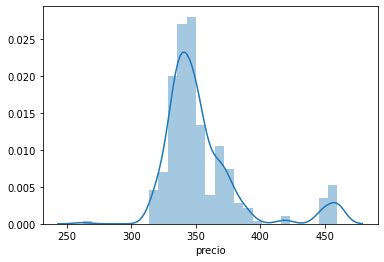

In [ ]:
sns.distplot(precios_limpios['precio'][precios_limpios.producto_id == '7790010616799'])

In [ ]:
productos_limpios[productos_limpios.id == '7790010616799']

,id,marca,nombre,presentacion,categoria1,categoria2,categoria3,id_referencia
17525,7790010616799,CAREFREE,Protectores Diarios Original sin Perfume Carefree 60 Un,60.0 un,NaN,NaN,NaN,7790010616799


In [ ]:
###OPCION2

In [ ]:
# Definimos un nuevo criterio de outlier, considerando 2 veces la media (probamos con 3 y 4 y aun asi salieron los mismos productos.)
def is_outlier(precio, media, desvia):
  precios_limpios.loc[precio <= 3*media, 'resultado_nuevo'] = 'normal'
  precios_limpios.loc[precio > 3*media, 'resultado_nuevo'] = 'extremo'
  #precios_limpios.loc[(2*media <= precio) & (precio <= 2*media), 'resultado_nuevo'] = 'normal'

In [ ]:
is_outlier(precios_limpios['precio'], precios_limpios['precio_mean'], precios_limpios['precio_std'])

In [ ]:
precios_limpios[(precios_limpios.resultado_nuevo.str.contains('extremo'))]

,precio,producto_id,sucursal_id,fecha,precio_mean,precio_std,precio_mean_diff,resultado,resultado_nuevo
1275,103.00,0000077900845,17-1-46,20200412,25.922187,14.185482,77.077812,extremo,extremo
68398,191.49,7622300759506,12-1-149,20200412,55.870000,55.704133,135.620000,normal,extremo
68399,202.99,7622300759506,12-1-185,20200412,55.870000,55.704133,147.120000,normal,extremo
86557,323.56,7790040174801,15-1-146,20200412,38.724706,34.970491,284.835294,extremo,extremo
306563,16995.89,7792389079939,6-1-6,20200412,1822.408000,5062.170147,15173.482000,normal,extremo
315759,759.00,7792860004412,10-1-25,20200412,190.480000,284.261643,568.520000,normal,extremo
67021,202.99,7622300759506,12-1-185,20200419,54.693529,52.159201,148.296471,normal,extremo
67022,191.49,7622300759506,12-1-99,20200419,54.693529,52.159201,136.796471,normal,extremo
297940,16995.89,7792389079939,6-1-4,20200419,1658.652727,4854.289600,15337.237273,extremo,extremo
306849,759.00,7792860004412,10-1-26,20200419,191.040000,283.983222,567.960000,normal,extremo


In [ ]:
filtro_productos_outliers = precios_limpios[(precios_limpios.resultado_nuevo == 'extremo')]['producto_id'].unique()
productos_limpios[(productos_limpios.id.isin(filtro_productos_outliers))]

,id,marca,nombre,presentacion,categoria1,categoria2,categoria3,id_referencia
139,0000077900845,TITA,Galletitas Bañadas en Chocolate Relleno Limon Terrabusi Tita 18 Gr,18.0 gr,NaN,NaN,NaN,0000077900845
16841,7622300759506,MILKA,Alfajor Mousse Leche Milka 42 Gr,42.0 gr,NaN,NaN,NaN,7622300759506
18270,7790040174801,MACUCAS,Galletitas Sabor Chocolate con Relleno de Vainilla Macucas 123 Gr,123.0 gr,NaN,NaN,NaN,7790040174801
29532,7790895641336,POWERADE,Bebida Isotonica Frutas Tropicales Powerade 500 Cc,500.0 cc,NaN,NaN,NaN,7790895641336
41013,7792389079939,X5,Espirales X5 4 Un,4.0 un,NaN,NaN,NaN,7792389079939
42280,7792860004412,BABY DOLL,Chupetin Baby Doll 18 Un,1.0 un,NaN,NaN,NaN,7792860004412
50101,7795697615172,MILLER,Cerveza Rubia en Lata Miller Lite 473 Cc,473.0 cc,NaN,NaN,NaN,7795697615172


In [ ]:
productos_limpios[(productos_limpios.id == '8711700045902')]

,id,marca,nombre,presentacion,categoria1,categoria2,categoria3,id_referencia
69982,8711700045902,SUN,Abrillantador Liquido para Lavavajillas Sun Progress 500 Cc,500.0 cc,NaN,NaN,NaN,8711700045902


In [ ]:
precios_limpios[precios_limpios.producto_id == '8711700045902']

,precio,producto_id,sucursal_id,fecha,precio_mean,precio_std,precio_mean_diff,resultado,resultado_nuevo
475650,793.4,8711700045902,1-1-7,20200426,723.857115,127.623332,69.542885,normal,normal
475651,755.0,8711700045902,10-1-142,20200426,723.857115,127.623332,31.142885,normal,normal
475652,772.0,8711700045902,10-1-147,20200426,723.857115,127.623332,48.142885,normal,normal
475653,708.0,8711700045902,10-1-159,20200426,723.857115,127.623332,15.857115,normal,normal
475654,715.0,8711700045902,10-1-233,20200426,723.857115,127.623332,8.857115,normal,normal
...,...,...,...,...,...,...,...,...,...
412342,729.0,8711700045902,9-2-4,20200518,725.216909,143.047723,3.783091,normal,normal
412343,919.0,8711700045902,9-2-725,20200518,725.216909,143.047723,193.783091,normal,normal
412344,879.0,8711700045902,9-3-5222,20200518,725.216909,143.047723,153.783091,normal,normal
412345,919.0,8711700045902,9-3-5251,20200518,725.216909,143.047723,193.783091,normal,normal


In [ ]:
precios_limpios['resultado_nuevo'].value_counts(dropna=False)

normal     2214760
extremo         20
Name: resultado_nuevo, dtype: int64

In [ ]:
##OPCION3


In [ ]:
def quantil_25(x):
  return np.quantile(x, .25)
def quantil_75(x):
  return np.quantile(x, .75)

precios_cuartiles=precios_limpios.groupby(['producto_id','fecha']).agg(cuartil_25=('precio',quantil_25),
                                                                                                     cuartil_75=('precio',quantil_75))



In [ ]:

precios_limpios = pd.merge(precios_limpios, precios_cuartiles, left_on=['producto_id', 'fecha'], right_index=True)

precios_limpios.head()

In [ ]:


def is_outlier(precio, cuartil_25, cuartil_75):
  precios_limpios.loc[precio > cuartil_75+(3*(cuartil_75-cuartil_25)), 'resultado_ri'] = 'extremo superior'
  precios_limpios.loc[precio < cuartil_25-(3*(cuartil_75-cuartil_25)), 'resultado_ri'] = 'extremo inferior'
  precios_limpios.loc[(cuartil_75+3*(cuartil_75-cuartil_25) >= precio) & (precio >= cuartil_25-3*(cuartil_75-cuartil_25)), 'resultado_ri'] = 'normal'
  precios_limpios.loc[(cuartil_25==cuartil_75), 'resultado_ri'] = 'normal'

In [ ]:
is_outlier(precios_limpios['precio'], precios_limpios['cuartil_25'], precios_limpios['cuartil_75'])

In [ ]:
precios_limpios['resultado_ri'].value_counts(dropna=False)

In [ ]:
precios_limpios[(precios_limpios.resultado_ri.str.contains('extremo'))]

In [ ]:
##OPCION4
precios_limpios

In [ ]:
Precios_outliers = pd.merge(precios_limpios,sucursales_limpios,left_on='sucursal_id',right_on='id',how='left')

In [ ]:
Precios_outliers.head()

In [ ]:
Precios_outliers.columns

In [ ]:
Precios_outliers=Precios_outliers.drop(['precio_mean',
       'precio_std', 'precio_mean_diff',
       'cuartil_25', 'cuartil_75', 
       'banderaId', 'banderaDescripcion', 'comercioRazonSocial',
       'localidad', 'direccion', 'lat', 'lng', 'sucursalNombre',
       'sucursalTipo', 'nom_provincia'], axis=1)

In [ ]:
########una vez que se unen los dataset es nenecario tomar la decision de eliminar todos los casos que no matcheen con la sucursal ni su ibucacion.

In [ ]:
Precios_outliers.head()

In [ ]:
#######lo saque de la notebook de las chicas para ver como une dos archivos. 

Precios_outliers[['id','sucursal_id']].isnull().sum()

In [ ]:

Precios_outliers[Precios_outliers.id.isnull()]['sucursal_id'].unique()


In [ ]:
Precios_outliers = Precios_outliers[Precios_outliers.id.notna()]

In [ ]:
Precios_outliers[['id','sucursal_id']].isnull().sum()

In [ ]:
##Una vez eliminados aquellos casos que no matchean, es necesario revisar los outlier con el criterios del rango intercuartilico y calculando la media y el desvio

In [ ]:
pr_mean_std = Precios_outliers.groupby(['producto_id','fecha','region']).agg(pr_mean=('precio', 'mean'), pr_std=('precio', lambda x: np.std(x)))


In [ ]:
pr_mean_std.head()

In [ ]:
pr_cuartiles=Precios_outliers.groupby(['producto_id','fecha','region']).agg(cuartil_25=('precio',lambda x: np.quantile(x, .25)),
                                                                            cuartil_75=('precio',lambda x: np.quantile(x, .75)))



In [ ]:
pr_cuartiles.head()

In [ ]:
Precios_outliers = pd.merge(Precios_outliers,pr_mean_std,left_on=['producto_id', 'fecha','region'],right_on=['producto_id','fecha','region'],how='left')

In [ ]:
#Precios_outliers=Precios_outliers.drop(['pr_mean_x',
 #      'pr_mean_y', 'pr_std_x',
  #     'pr_std_y'], axis=1)

In [ ]:
Precios_outliers

In [ ]:
Precios_outliers = pd.merge(Precios_outliers,pr_cuartiles,left_on=['producto_id', 'fecha','region'],right_on=['producto_id','fecha','region'],how='left')

In [ ]:
Precios_outliers

In [ ]:
def is_outlier(precio, cuartil_25, cuartil_75):
  Precios_outliers.loc[precio > cuartil_75+(3*(cuartil_75-cuartil_25)), 'rdo_ri_geo'] = 'extremo superior'
  Precios_outliers.loc[precio < cuartil_25-(3*(cuartil_75-cuartil_25)), 'rdo_ri_geo'] = 'extremo inferior'
  Precios_outliers.loc[(cuartil_75+3*(cuartil_75-cuartil_25) >= precio) & (precio >= cuartil_25-3*(cuartil_75-cuartil_25)), 'rdo_ri_geo'] = 'normal'
  Precios_outliers.loc[(cuartil_25==cuartil_75), 'rdo_ri_geo'] = 'normal'

In [ ]:
is_outlier(Precios_outliers['precio'], Precios_outliers['cuartil_25'], Precios_outliers['cuartil_75'])

In [ ]:
Precios_outliers['rdo_ri_geo'].value_counts(dropna=False)

In [ ]:
Precios_extremos=Precios_outliers[(Precios_outliers.rdo_ri_geo.str.contains('extremo'))]
print("Cantidad de Registros Outliers:", len(Precios_extremos))
print("Outliers / Total Dataset:",  round((len(Precios_extremos) / len(Precios_outliers) * 100),2), '%')


In [ ]:
Precios_extremos['producto_id'].value_counts(dropna=False)

In [ ]:
##miramos algunos casos
##1)7791337560819   yogurisimo
##)el producto aparece outliers en el centro, patagonia y en el norte. 
##en el centro el 40 de 247 son outliers (18%) 

productos_limpios[productos_limpios.id=='7791337560819']

In [ ]:
Precios_extremos[Precios_extremos.producto_id=='7791337560819']

In [ ]:
##Precios_outliers[(Precios_outliers.producto_id == '7791337560819') & (Precios_outliers.region=='Centro')].count()
Precios_outliers[(Precios_outliers.producto_id == '7791337560819')].count()

In [ ]:
##Precios_extremos[(Precios_extremos.producto_id == '7791337560819') & (Precios_extremos.region=='Centro')].count()
#Precios_extremos[(Precios_extremos.producto_id == '7791337560819')].count()

In [ ]:
filtro=Precios_outliers[(Precios_outliers.producto_id == '7791337560819') & (Precios_outliers.region=='Centro')]
sns.distplot(filtro['precio'])

In [ ]:
filtro=Precios_outliers[(Precios_outliers.producto_id == '7791337560819') & (Precios_outliers.region=='Patagonia')]
sns.distplot(filtro['precio'])

In [ ]:
filtro=Precios_outliers[(Precios_outliers.producto_id == '7791337560819') & (Precios_outliers.region=='Norte Grande')]
sns.distplot(filtro['precio'])

In [ ]:
##miramos unos casos
productos_limpios[productos_limpios.id=='7790040994904']

In [ ]:
Precios_outliers[(Precios_outliers.producto_id == '7790040994904')].count()
##347

In [ ]:
Precios_extremos[(Precios_extremos.producto_id == '7790040994904')].count()
##42

In [ ]:
sns.distplot(filtro['precio'])

In [ ]:
filtro=Precios_outliers[(Precios_outliers.producto_id == '7790040994904')]
sns.distplot(filtro['precio'])

In [ ]:
filtro.rdo_ri_geo.value_counts()
##0.08 y 0.03

In [ ]:
filtro=Precios_outliers[(Precios_outliers.producto_id == '7790040994904') & (Precios_outliers.region=='Centro')]
sns.distplot(filtro['precio'])

In [ ]:
filtro.rdo_ri_geo.value_counts()

In [ ]:
filtro=Precios_outliers[(Precios_outliers.producto_id == '7790040994904') & (Precios_outliers.region=='Norte Grande')]
sns.distplot(filtro['precio'])

In [ ]:
filtro.rdo_ri_geo.value_counts()

In [ ]:
###ejemplo con un solo outliers

In [ ]:
#7793750000156     1
#7798124361550     1
#7702031887942     1
#4005808555802     1
#7793940198007     1

In [ ]:
####frente a estos valorees encontrados. Decidimos sacar los valores outliers ya que la cantidad es infima y prepara mejor el set de datos para un futuro

In [ ]:
len(Precios_extremos)

In [ ]:
##LLLEEEOOOO: ES NECESARIO SACAR ESTOS ANTES DEL ANALISIS TUYO
Precios_extremos.head()

In [ ]:
precios_limpios[(precios_limpios.producto_id=='0000040084107') & (precios_limpios.fecha=='20200412') & (precios_limpios.sucursal_id=='13-1-106')]

In [ ]:
Precios_outliers.head()

In [ ]:
precios_limpios = pd.merge(precios_limpios,Precios_outliers,left_on=['producto_id', 'sucursal_id','fecha','precio'],right_on=['producto_id','sucursal_id','fecha','precio'],how='left')

In [ ]:
precios_limpios

In [ ]:
##comprobamos que se unio bien
precios_limpios.rdo_ri_geo.value_counts()

In [ ]:
precios_limpios.columns

In [ ]:
precios_limpios=precios_limpios.drop(['resultado_y','resultado_nuevo_y',], axis=1)

In [ ]:
precios_limpios=precios_limpios.drop(['id'], axis=1)

In [ ]:
#recios_limpios[precios_limpios[''].str.contains('-')]
#precios_limpios.drop(precios_limpios[precios_limpios.rdo_ri_geo.str.contains('extremo')], inplace = True)

precios_limpios=precios_limpios[precios_limpios.rdo_ri_geo=='normal']

In [ ]:
precios_limpios.rdo_ri_geo.value_counts()

In [ ]:
#productos_limpios[productos_limpios.id=='7791337560819']
#Precios_extremos[Precios_extremos.producto_id=='7791337560819']
#
##Precios_outliers[(Precios_outliers.producto_id == '7791337560819') & (Precios_outliers.region=='Centro')].count()
#Precios_outliers[(Precios_outliers.producto_id == '7791337560819')].count()

#filtro=Precios_outliers[(Precios_outliers.producto_id == '7791337560819') & (Precios_outliers.region=='Centro')]
#sns.distplot(filtro['precio'])

In [ ]:
#ANALIZAR EL SET DE DATOS PRECIOS_extremo

Precios_extremos['precio'].describe()

In [ ]:
Precios_extremos[Precios_extremos.precio ==1.220000]
Precios_extremos[Precios_extremos.precio ==1.220000]

In [ ]:
productos_limpios[productos_limpios.id=='7622300871918']

In [ ]:
Precios_extremos[Precios_extremos.precio ==16995.89]

In [ ]:
productos_limpios[productos_limpios.id=='7792389079939']

In [ ]:

Precios_extremos.groupby(['fecha']).agg(cantidad=('producto_id', 'count'))

In [ ]:

Precios_extremos.groupby(['region']).agg(cantidad=('producto_id', 'count'))

In [ ]:
precios_limpios.groupby(['region']).agg(cantidad=('producto_id', 'count'))

In [ ]:
Precios_extremos.groupby(['sucursal_id']).agg(cantidad=('producto_id', 'count'))

In [ ]:
sucursales_limpios[sucursales_limpios.id=='10-1-142']

#### 2.7. Evaluar Cómo Comprimir los Datos Para su Almacenamiento Más Eficiente

#### 2.8. Guardar el Set de Datos con un Nombre Informativo

### 3. Pasos de Limpieza Deseables

#### 3.1. Ordenar Variables/Columnas

#### 3.2. Quitar Variables/Columnas Irrelevantes

Tenemos alguna en este caso?

**dataset de precios**


**dataset de sucursales**

In [ ]:
sucursales_limpios.head(1)



In [ ]:
sucursales_limpios.columns

In [ ]:
sucursales_limpios=sucursales_limpios.drop(['comercioId', 'banderaId', 'comercioRazonSocial', 'provincia', 'localidad', 'direccion'], axis=1)

In [ ]:
productos_limpios.head(1)

In [ ]:
productos_limpios=productos_limpios.drop(['categoria1', 'categoria2', 'categoria3'], axis=1)

In [ ]:
productos_limpios

#### 3.3. Renombrar Variables de Grillas

Esto se puede hacer de manera transparente a través de un diccionario.


#### 3.4. Categorizar Variables que Contengan “Otros”

#### 3.5. Agregar Metadata a los Datos

Cuando y como fueron obtenidos, limpieza realizada, decisiones implementadas, asunciones, etc.

## II. Análisis en Profundidad del Contenido

### 1. Features Tipo Objetos

Primero nos quedamos con las features cuyo tipo es 'Objeto'.

In [ ]:
# Observamos los campos que tienen tipo 'Objeto'
precios.dtypes[precios.dtypes == 'object']

In [ ]:
precios['fecha'] = pd.to_datetime(precios['fecha'], format="%Y%m%d")

In [ ]:
precios.dtypes

In [ ]:
#del precios
#del productos
#del sucursales
#del Precios_outliers
#del Precios_outliers

### 2. producto_id en Entidad Producto

Todos los producto_id en el dataset de precios se encuentran en la entidad de productos? Tomamos decisiones al respecto?

In [ ]:
productos_limpios.sample(2)

In [ ]:
precios_limpios.sample(2)

In [ ]:
##### ver si todos los precios reportados tienen un id producto que matchea
lei_prec_prod = pd.merge(precios_limpios, productos_limpios, left_on='producto_id', right_on='id', how='left')
lei_prec_prod.columns

In [ ]:
lei_prec_prod[['id','producto_id']].isna().sum()

In [ ]:
lei_prec_prod[lei_prec_prod['id'].isnull()]

In [ ]:
productos_sin_id = lei_prec_prod[lei_prec_prod.id.isnull()]['producto_id'].tolist()

In [ ]:
###Hay 7 prodcutos que estan reportados en la fecha 20200419 (primer fecha de nuestro dataset) que no tienen informacion en el fichero de prodcutos.
##Los productos que no matcheen es necesario eliminarlos del analisis, porque no tenemos informacion sobre marca ni nada.

In [ ]:
precios_limpios = precios_limpios[~precios_limpios.producto_id.isin(productos_sin_id)]

In [ ]:
precios_limpios[precios_limpios.producto_id.isin(productos_sin_id)]

In [ ]:
precios_limpios

### 3. sucursal_id en Entidad Sucursales


Todos los sucursal_id en el dataset de precios se encuentran en la entidad de sucursales? Tomamos decisiones al respecto?


In [ ]:
precios_limpios

In [ ]:
#######lo saque de la notebook de las chicas para ver como une dos archivos. 
lei_prec_sucursal = pd.merge(precios_limpios,sucursales_limpios,left_on='sucursal_id',right_on='id',how='left')


In [ ]:
lei_prec_sucursal[['id','sucursal_id']].isnull().sum()

####todos matchean porque los que no, fueron sacados en la parte de outliets

In [ ]:
##hay 17998 registros reportados en el dataset precio que no tiene id en el de sucursales.
## De estos 17998 casos son 20 sucursales unicas

### 4. Precios Reportados por Sucursal

In [ ]:
Cuántos precios reporta cada sucursal? Todas las sucursales reportan precios en todas las fechas?

In [ ]:
sucursales_limpios.count()

In [ ]:
## DE LAS 2333 sucursales que existen el el dataset original solo 508 son las que se reportan en los precios.
precios_limpios.groupby(['sucursal_id']).agg(cantidad=('producto_id', 'count'))


In [ ]:
##y no todas reportan en todas las fechas
precios_limpios.groupby(['sucursal_id','fecha']).agg(cantidad=('producto_id', 'count'))

### 5. Transformación y Ampliación de Características de Productos

#### 5.1 Presentación

In [ ]:
productos_limpios[productos_limpios.presentacion.isnull()]
# Por lo que vemos, la variable 'presentacion' no tiene nulos.

In [ ]:
productos_limpios['presentacion_depurada'] = productos_limpios['presentacion'].str.lower()
productos_limpios['presentacion_depurada']

In [ ]:
productos_limpios['um_en_presentacion'] = productos_limpios['presentacion_depurada'].str[-2:]
productos_limpios['um_en_presentacion'].unique()

In [ ]:
productos_limpios['cantidad_en_presentacion'] = productos_limpios['presentacion_depurada'].str[0:-3]
productos_limpios[productos_limpios.cantidad_en_presentacion.isnull()]

In [ ]:
# Convierto los numeros en integer para luego tener una expresion String sin el caracter '.'
productos_limpios['presentacion_depurada_str'] = productos_limpios.apply(lambda x: str(int(float(x['cantidad_en_presentacion']))) + ' ' + x['um_en_presentacion']
                if int(float(x['cantidad_en_presentacion']))-float(x['cantidad_en_presentacion']) == 0.
                else str(float(x['cantidad_en_presentacion'])) + ' ' + x['um_en_presentacion'], axis=1)

productos_limpios['presentacion_depurada_str'].sample(7)

#### 5.2 Nombre de Productos

In [ ]:
productos_limpios['nombre_depurado'] = productos_limpios['nombre'].str.lower().fillna('')
productos_limpios['nombre_depurado']

Al tratar de depurar la unidad de medida, aparecieron las siguientes inconsistencias:

In [ ]:
filtro_nombre_sin_presentacion = productos_limpios.apply(lambda x: x['presentacion_depurada_str'] not in x['nombre_depurado'], axis=1)
print('Cantidad de Productos cuyo nombre no coincide con su presentacion:', len(productos_limpios[filtro_nombre_sin_presentacion]),'\n')
productos_limpios[['id','nombre_depurado', 'presentacion_depurada', 'presentacion_depurada_str']][filtro_nombre_sin_presentacion].sample(5)

Qué pasó en estos casos? Deberíamos depurar el nombre o modificar la um?
Cómo podemos hacer para extraer la um del nombre?

In [ ]:
def is_float(number):
  try:
    float(number)
    return True
  except Exception as e:
    return False



In [ ]:
def extraer_cant_um_de_nombre_enhanced(df):
  cant_en_nombre_prod = []
  um_en_nombre_prod = []
  pattern_um = r'(?P<cant_en_nombre_prod>[\d\.]+)\s?(?P<um_en_nombre_prod>\D{1,3}$)'

  for idx, producto in df.iterrows(): 
      um = producto['um_en_presentacion']  # Si no encuentro un match, lo dejo como esta en la presentacion
      cantidad = producto['cantidad_en_presentacion']  # Si no encuentro un match, lo dejo como esta en la presentacion 
      
      match = re.search(pattern_um, producto["nombre_depurado"])
      if match is not None:
        if is_float(match.group('cant_en_nombre_prod')):
          cantidad = match.group('cant_en_nombre_prod') 
          um = match.group('um_en_nombre_prod')
      
      cant_en_nombre_prod.append(cantidad)
      um_en_nombre_prod.append(um)

  return cant_en_nombre_prod, um_en_nombre_prod

In [ ]:
# Llamo a la funcion extractora de 'um' y 'cantidad' del nombre_depurado
cant_en_nombre_prod, um_en_nombre_prod = extraer_cant_um_de_nombre_enhanced(productos_limpios)

# Guardo el resultado de la funcion en las respectivas NUEVAS columnas
productos_limpios['cant_en_nombre_prod'] = cant_en_nombre_prod
productos_limpios['um_en_nombre_prod'] = um_en_nombre_prod 

In [ ]:
# Armo un filtro de columnas de interes para 
filtro_columnas_presentacion_interes = ['nombre_depurado',
                                        'presentacion_depurada_str',
                                        'cantidad_en_presentacion',
                                        'um_en_presentacion',
                                        'cant_en_nombre_prod',
                                        'um_en_nombre_prod']


In [ ]:
productos_limpios[filtro_columnas_presentacion_interes][filtro_nombre_sin_presentacion].sample(7)

In [ ]:
# Veamos cómo nos quedaron las 'um'' extraídas del nombre_depurado
productos_limpios['um_en_nombre_prod'].unique()

In [ ]:
# Utilizamos una serie de conversiones para arreglar algunas 'um'
productos_limpios['um_en_nombre_prod'] = productos_limpios['um_en_nombre_prod'].str.replace('[^a-zA-Z]','')
productos_limpios['um_en_nombre_prod'] = productos_limpios['um_en_nombre_prod'].str.replace('k\w+','kg')
productos_limpios['um_en_nombre_prod'] = productos_limpios['um_en_nombre_prod'].str.replace('g\w+','gr')
productos_limpios['um_en_nombre_prod'] = productos_limpios['um_en_nombre_prod'].str.replace('un\w+','un')
productos_limpios['um_en_nombre_prod'] = productos_limpios['um_en_nombre_prod'].str.replace('^g$','gr')
productos_limpios['um_en_nombre_prod'] = productos_limpios['um_en_nombre_prod'].str.replace('^l$','lt')
productos_limpios['um_en_nombre_prod'] = productos_limpios['um_en_nombre_prod'].str.replace('^u$','un')
productos_limpios['um_en_nombre_prod'] = productos_limpios['um_en_nombre_prod'].str.replace('^c$','cc')

In [ ]:
productos_limpios['um_en_nombre_prod'].unique()
# Podemos ver que todavia nos quedan algunas unidades sin determinar. No nos preocupa por el momento ya que
# luego vamos a crear una variable que tenga la um final (o limpia) y la cantidad final (o limpia)

In [ ]:
# 
# Algunos productos tienen en su nombre la presentacion y la cantidad de unidades, veamos cuantos son:
print(len(productos_limpios.nombre_depurado[productos_limpios.nombre_depurado.str.contains(r'.*\d{1,2}\sun\s.*')]))
productos_limpios.nombre_depurado[productos_limpios.nombre_depurado.str.contains(r'.*\sun\s.*')].sample(5)


In [ ]:
# En esta variable vamos a guardar la presentacion que aparece en el NOMBRE del producto con el formato de presentacion_depurada_str
# para poder comparar ambas y luego decidir con qué presentación quedarse.
def get_um_cantidad_en_nombre(cantidad, um):
  nombre_str = ''
  try:  
    if int(float(cantidad))-float(cantidad) == 0.:
      nombre_str = str(int(float(cantidad))) + ' ' + um
    else:
      nombre_str = str(float(cantidad)) + ' ' + um
  except Exception as e: 
    nombre_str = str(cantidad) + ' ' + um
  finally:
    return nombre_str

In [ ]:
productos_limpios['presentacion_en_nombre_depurada'] = productos_limpios.apply(lambda x: get_um_cantidad_en_nombre(x['cant_en_nombre_prod'], x['um_en_nombre_prod']), axis=1)

In [ ]:
filtro_columnas_presentacion_interes.append('presentacion_en_nombre_depurada')
productos_limpios[filtro_columnas_presentacion_interes][filtro_nombre_sin_presentacion].sample(5)

In [ ]:
#filtro_presentaciones_diff = productos['presentacion_depurada_str'] != productos['presentacion_en_nombre_depurada'] 
filtro_presentaciones_diff = productos_limpios.apply(lambda x: x['presentacion_depurada_str'] not in x['presentacion_en_nombre_depurada'], axis=1)
len(productos_limpios[filtro_columnas_presentacion_interes][filtro_presentaciones_diff])

In [ ]:
# Teniendo todas las presentaciones "normalizadas" veamos cuantos productos tienen la presentacion original en su nombre y cuántos tiene
# la presentacion nueva (extraida de su nombre pero "curada") en su nombre. Esto nos va a dar una idea de que cantidad de datos
# tenemos que limpiar/curar
filtro_presentacion_or_en_nombre = [row[0] not in row[1] for row in zip(productos_limpios['presentacion_depurada_str'], productos_limpios['nombre_depurado'])]
print("Cantidad de Productos cuya Presentacion Depurada no coincide con la presentacion del Nombre Depurado",'\n', len(productos_limpios[filtro_presentacion_or_en_nombre]))


In [ ]:
filtro_presentacion_ext_en_nombre = [row[0] not in row[1] for row in zip(productos_limpios['presentacion_en_nombre_depurada'], productos_limpios['nombre_depurado'])]
print("Cantidad de Productos cuya Presentacion Extraida y Depurada no coincide con la presentacion del Nombre Depurado",'\n', len(productos_limpios[filtro_presentacion_ext_en_nombre]))
productos_limpios[filtro_presentacion_ext_en_nombre].sample(2)

####*Intentaremos hacer una funcion que seleccione la "mejor opcion" de presentacion de acuerdo a las siguientes reglas:*

[IMAGEN](https://app.diagrams.net/?title=GP2_ArbolDecision_AyC_Precios_Claros.drawio#R7Vxdc5s4FP01nu4%2BxCMkPsRjHafdnbbbzmRmu92XHRlkmw0gB0Pj9NevhPmU5MZxY%2FBSMpMxEkLAPUfS0dUVE3Qd7d4mZLP%2BwHwaTiDwdxM0n0BoWhDwH5HzuM%2BB2CpyVkng7%2FOMOuM2%2BEaLzLJYFvh02yqYMhamwaad6bE4pl7ayiNJwh7axZYsbN91Q1ZUybj1SKjmfg78dF3kGgDUJ36jwWpd3Lp6vwXx7lYJy%2BLifhOIlvnf%2FnREyrqK8ts18dlDIwvdTNB1wli6P4p21zQUxi3Ntr%2FuzYGz1XMnNE6PuoASZDiOC3zoERejq6KGryTMCltkEU%2FTWFSb0C2vl3gBE0kOEK9olRFRIeH%2FdcmYRYuEX%2F%2BmeMv0sbQsvz0HkSdmD%2Bsgpbcb4okzD5xIPG%2BdRiFPGfwwNyIVjwl4qrKTOOWxKPCKEyFZ0HBWWf2ahSzhp2IWi3ts04TdVRCKa5csTt%2BQKAgFNf%2BkiU9iUmQXNDQ4CDMSBquYJzz%2BvpRXOFMNW1qKJindNbIKQ7%2BlLKJp8siLVO2iAL1sFUXyocEwu8hbN8hVsY4UrF5VVdfI8oMCXD3Qu78fPPzxPtjsgmiezbx3d06qAdsjcRr4xD8Wcrn8CLwGeBtKwPePPFbx8XkPWCRZkq7ZisUkvKlzJWDqMu8Z2xRG%2Fpem6WNhTpKlrI3sQVNuWZZ49DuPC%2FflxDN%2B1%2BAJDUkafG334jrjFZd%2BYgF%2FlAooZLSBQqZk%2F5QkK5oWV0kQVI9xOipwbI9dtEeI2jAbbu%2Ft0VGQv8%2BoLyFagAntkD%2FPbJHwo5U4Kovm42%2BbIQMBfRmEYVk5l1S%2BRbFvVndonMFwgWz7PDRBptUhTdS%2B4PZ3BU%2F%2BJmkbOMV04n0DrmxfFyeiwPf33TndBt%2FIIq9KYLkRvVr%2BwNZsYs1FXbwH3xawvIxJDSyNhJqWhzQWhedqd%2B4x7a7dpMbW10nrO6bx4W7VMlDIokIc%2B6%2FF%2FFOYLyTbrcCqiSzdBelfBXzi%2BEsjf75rnJg%2FlomYP3t%2BydS23TLjS54BYJmur81TrYs%2F0STgFhBQ5pk%2FLMP2KujpVvWkXGtgaWmgLPN%2BUNWZttTp2BJD9u%2BtqDqlIkuSh5W7oiN5aKjztWER8FII49hT5Bqm5VjAAo4NUVsuGniKLAshF1gugo4JT6MTwgdkaFd0UiXG8%2Bn005HDknoTQ54jHgu%2FbRlTLPUnxtQ2u%2BUAUjgwAJmJXEttsbaiHzpVmoapWPqPj%2F97S8uurao19GZma4hmVhxToG8z24qZT3VYlIXGydIPuCqcNj8srPKj67UF1aVVIs1nyczPvJSJuURAY5HFqXGfiVWvWRbXx%2BKE8F2CX7JYcIpufx0MUV4AduxK3cIFwI4V2FXERlEpaUFHBtIwp6Uln6srMZZ1JcLWFEuTlHPrStWxNtLgSRrY0goxQqfOLSRZZoLOZxblEwxrZmEDCaG%2B9S5UfUID0LtY0jMI1v1hb5ZW3SUhmShLsimNA6JKXv5LIiFI4sVW%2FOTSN68FvMriV6XQGbVNtVQEpD6scrz0J26g6i3RzHp4W0tIkOfGGf2qIUNr%2FtMkwUDg72UO5NiXxxfV5zOqoCdVkCuLF1x7754tht0DpOhKBanuqJEBTzLAAIZCgdPwN4DsGbHcqdv865YOqttsAKJYVmtW395JqPqeBiCKDWBKraLv6Bk4hs9cqhrC0uKyo5modhw%2FU1JzHAufNxZKTiHbFnIIVH9SjcePjPAAQzoaC9FLRLP8fHQwVDqcSAAIeiaA6lAZwigtx7jamkWZTkdpNMgYDz5O9WdnmMXvH%2FEXG8%2B3cbhw5h%2Bct7rdG%2Fn2DC5T7vhPc7FzyZJIaB6fludH319rOVtqQleGo1Ev5wu916GrNqJxtHp6QxV2p0YbylODb00Mpm6rKhEth%2BqJPHbQuYYvLSEGGc9lSmH3Vxonaqedqs5%2Ftp9CbjckLieRjdlmXkiI4n0pftNmQe3CjFJd0y8vuudXB2sbSJ%2FdyxRVcs3qNsW6nXbxqnPu%2BV38GF5%2FxC7b74bX8y5nCoBp28A1ge1AW3LRHjtgQGl%2B2%2FNwobokByDCoTQZvbK6Gy6Wn%2F9x4gjM0Y03e%2Ff6%2Ff2NtSRXavSZ8lEKuN81ned7LGaeWKod9XdLBUhds9npBwu0wLoqPj1%2BsODcHyIQq1RWO4jPcsxjQ7iOqg6q1R3oWU%2FoAbUQavZPDqALNKGwbe2OBeZBO%2FfVKY77BjvaGgbQFBi1sDHtNhWAWHqu9w3C03SNCYQ%2BUvz%2FVeT%2FOSM99fRSHV8DmAnr%2Bkx0AW35qBC08Ushnc5kZb3U7fYbPU9U99SohE9ZzZEcYo5mhtM1tGNM2UkLp1J8KLZeZh1dZogrb9o49%2FD7Em6rn48OUKXDiQSQN%2Bd2ToBhRrvJ%2FmGsWQPsVnqpzqUBzF8Nw7gwO2t2jo17y%2FsTt0qgmKsLJexWAml2vY2BpxdCF3lNQEuXl4o85cn6Y9n7AbX%2BJDm6%2BQ8%3D)|

In [ ]:
def is_pack(nombre_producto):
  # En el peor de los casos, si la palabra 'pack' esta al ultimo de la cadena, la funcion demora "23.5 µs per loop"
  for palabra in nombre_producto.split(' '):
    if re.search(r'^pack', palabra) is not None:
      return True
  return False


def obtener_presentacion_limpia(df):
  um_limpia = []
  cant_limpia = []


  # Defino mi patron de productos "empaquetados". Aquellos que tienen 'y' ó '+' en su nombre además de contar con
  # numeros y unidades en ambos lados del caracter concatenador.
  pack_pattern = r'^.*\s\d{1,3}\s{0,1}\w{1,3}\s[y\+]\s.*\d{1,3}\s{0,1}\w{1,3}.*$'

  # Defino patron de productos cuyo nombre contiene 'un'.
  un_pattern = r'(?P<cant>[\d]+)\sun'

  for idx, producto in df.iterrows():
    producto_um_limpia = ''
    producto_cant_limpia = ''
    
    
    #is_pack = [True if re.search(patron, palabra) is not None else False for palabra in nombre_depurado.split(' ')
    if is_pack(producto['nombre_depurado']):
      producto_um_limpia = 'pack'
      producto_cant_limpia = 1

    # Si el patron de productos empaquetados es detectado en el nombre, o sea que el resultado NO es vacío...
    elif re.search(pack_pattern, producto['nombre_depurado']) is not None:
        producto_um_limpia = 'pack'
        producto_cant_limpia = 1
    
    elif producto['um_en_presentacion'] == producto['um_en_nombre_prod']:
      producto_um_limpia = producto['um_en_presentacion']

      if float(producto['cantidad_en_presentacion']) == float(producto['cant_en_nombre_prod']):
        producto_cant_limpia = producto['cantidad_en_presentacion']
      else:
        producto_cant_limpia = producto['cant_en_nombre_prod']
    
    # Si el producto tiene unidades diferentes pero igual cantidad, me quedo con la unidad del nombre    
    elif float(producto['cantidad_en_presentacion']) == float(producto['cant_en_nombre_prod']):
      producto_cant_limpia = producto['cant_en_nombre_prod']
      if producto['um_en_nombre_prod'] in df['um_en_presentacion'].unique():
        producto_um_limpia = producto['um_en_nombre_prod']
      else:
        producto_um_limpia = producto['um_en_presentacion']

    # Si el producto no tiene ni la unidad ni la cantidad en comun entre nombre y presentacion, entonces intento
    # obtener la unidad del nombre, y si eso no sirve le dejo la unidad y cantidad de la presentacion como vino cargada
    # o la etiqueto como posible de ser removida
    else:
      extraer_unid = re.search(un_pattern, producto['nombre_depurado'])
      if extraer_unid is not None:
        producto_um_limpia = 'un'
        producto_cant_limpia = extraer_unid.group('cant') ## el 'cant' sale de un "extractor" que se define en el patron.
      elif producto['um_en_presentacion'] == 'un':
        producto_um_limpia = producto['um_en_presentacion']
        producto_cant_limpia = producto['cantidad_en_presentacion']
      
      elif producto['um_en_nombre_prod'] in df['um_en_presentacion'].unique():
        producto_um_limpia = producto['um_en_nombre_prod']
        producto_cant_limpia = producto['cant_en_nombre_prod']

      else:
        producto_um_limpia = producto['um_en_presentacion']
        producto_cant_limpia = producto['cantidad_en_presentacion']
    
    um_limpia.append(producto_um_limpia)
    cant_limpia.append(float(producto_cant_limpia))
  
  return um_limpia, cant_limpia
    

In [ ]:
um_limpia,cant_limpia = obtener_presentacion_limpia(productos_limpios)

In [ ]:
productos_limpios['um_limpia'] = um_limpia
productos_limpios['cant_limpia'] = cant_limpia

In [ ]:
# Veamos cuantos productos venian en 'pack' originalmente y cuantos fueron agregados por el script
# Considerar que hay varias marcas que tienen en su nomnre la palabra pack como 'doypack' por lo tanto la expresion regular
# considera solamente la palabra 'pack' suelta

print('Cantidad PACK ORIGINALES:', len(productos_limpios[productos_limpios.nombre_depurado.str.contains(r'^pack\s|\spack\s')]))
print('Cantidad PACK NUEVOS:', len(productos_limpios[productos_limpios.um_limpia.str.contains('pack')]) - len(productos_limpios[productos_limpios.nombre_depurado.str.contains(r'^pack\s|\spack\s')]))

In [ ]:
productos_limpios['um_limpia'].value_counts()

In [ ]:
# Veamos ahora cómo quedaron aquellos productos cuya presentacion suministrada no coincidía con la presentacion en el nombre
# del producto.
productos_limpios[['nombre_depurado', 'presentacion_depurada', 'presentacion_depurada_str', 'cant_limpia', 'um_limpia']][filtro_nombre_sin_presentacion].sample(3)

#### 5.3 Marca

In [ ]:
!pip install unidecode
from unidecode import unidecode

In [ ]:
# Hago una lista de palabras no importantes acotada ya que la lista provista por NTLK es muy variada y puede quitarnos algunas marcas
spanish_stopwords = ['ante', 'bajo', 'cabe', 'con', 'contra', 'de', 'desde','durante', 'en', 'entre', 'hacia', 'hasta', 'mediante', 'para', 'por', 'segun', 'sin', 'sobre', 'tras', 'la', 'las', 'los', 'del','el', 'a', 'y']

In [ ]:
def limpiar_palabras(columna, limpiar_stopwords=True):
  columna_limpia = []

  for contenido in columna:
    contenido = contenido.lower()
    contenido = unidecode(contenido)
    
    if limpiar_stopwords:
      palabra_limpia = ''
      palabras = contenido.split(' ')

      for palabra in palabras:
        if palabra not in spanish_stopwords:
          palabra_limpia += palabra.strip() + ' '
      columna_limpia.append(palabra_limpia.strip())
    else:
      columna_limpia.append(contenido)

  return columna_limpia

In [ ]:
productos_limpios['marca_depurada'] = limpiar_palabras(productos_limpios['marca'])

In [ ]:
print("Cantidad de Marcas Unicas:", len(productos_limpios['marca'].unique()))
print("Cantidad de Marcas Depuradas Unicas:", len(productos_limpios['marca_depurada'].unique()))

In [ ]:
# Veamos como quedaron algunas marcas en su version depurada y su version limpia
productos_limpios[['marca','marca_depurada']].sample(5)

In [ ]:
productos_limpios[['marca','marca_depurada']][productos_limpios.marca_depurada == ' ']
# Vemos que no hay marcas depuradas vacías

In [ ]:
productos_limpios['marca_depurada_unida'] = productos_limpios.marca_depurada.apply(lambda x: '_'.join(x.split(' ')))

In [ ]:
#Chequeamos cuantos valores hay en la nueva columna, para eso generamos un nuevo dataframe "summary" con la info que necesitamos
def get_column_stats(columna):
  counts = columna.value_counts()
  percent= columna.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
  accum = columna.value_counts(normalize=True).cumsum().mul(100).round(1).astype(str) + '%'
  return pd.DataFrame({'counts': counts, 'per': percent,'accum': accum })


In [ ]:
get_column_stats(productos_limpios['marca_depurada'])[:10]

In [ ]:
# Buscamos las marcas mas repetidas y guardamos el dataset resultante para posterior uso
marcas_mas_repetidas = productos_limpios['marca_depurada_unida'].value_counts()[:10].reset_index().rename(columns={'index':'marca_depurada_unida', 'marca_depurada_unida':'cantidad'})

In [ ]:
marcas_mas_repetidas[:10]

In [ ]:
productos_limpios['marca_depurada_unida'].value_counts().reset_index()[:10]['index'].tolist()

In [ ]:
# Esta funcion acepta una columna y una lista de palabras mas frecuentes
# Con ello, crea una nueva lista la cual contiene la palabra original (si se encuentra dentro de las mas frecuentes)
# o le pone la palabra suministrada
def get_dummy_column(column, top_rank=10, default_word='others'):
  
  dummy_list = column.value_counts().reset_index()[:top_rank]['index'].tolist()
  
  dummy_column = []

  for row in column:
    valor_dummy = default_word
    if row in dummy_list:
      valor_dummy = row
    dummy_column.append(valor_dummy)

  return dummy_column

In [ ]:
productos_limpios['marca_dummy'] = get_dummy_column(productos_limpios['marca_depurada_unida'], 10, 'otras_marcas')

In [ ]:
productos_limpios[['marca', 'marca_depurada_unida','marca_dummy']].sample(15)

In [ ]:
# Una vez que tenemos la columna nueva con las categorias dummy, utilizamos la funcion de Pandas para
# extender el dataframe.
productos_limpios = pd.concat([productos_limpios, pd.get_dummies(productos_limpios['marca_dummy'], prefix='marca')], axis=1)
productos_limpios.sample(3)

### DUMMY DE PRODUCTOS

In [ ]:
# DUMMY DE UM DE PRODUCTOS
productos_limpios = pd.concat([productos_limpios, pd.get_dummies(productos_limpios['um_limpia'], prefix='um')], axis=1)

In [ ]:
productos_limpios.filter(regex=("um.*")).sample(2)

In [ ]:
# DUMMY DE NOMBRE DE PRODUCTO (dejamos para mas adelante la alternativa de hacer dummy sobre nombre+marca)
# Quitemos primero la presentacion del nombre:
productos_limpios['nombre_sin_presentacion'] = productos_limpios['nombre_depurado'].apply(lambda x: re.sub('[\d\.]+\s?\D{1,3}$', '', x))

In [ ]:
productos_limpios[['nombre_depurado','nombre_sin_presentacion']].sample(5)

In [ ]:
# Quitamos la marca del nombre
# Para eso definimos una funcion que, de encontrar la marca en el nombre, primero se fija de que
# el nombre del producto no quede vacío.
# De ser así, deja el nombre como está, sino elimina la marca del nombre
def quitar_marca(nombre, marca):
  nombre_sin_marca = re.sub(marca, '', nombre) 
  if len(nombre_sin_marca) > 1:
    return nombre_sin_marca
  else:
    return nombre

In [ ]:
productos_limpios['nombre_sin_presentacion_marca'] = productos_limpios.apply(lambda x: quitar_marca(x.nombre_sin_presentacion, x.marca_depurada), axis=1)

In [ ]:
productos_limpios[['nombre_depurado','marca_depurada', 'nombre_sin_presentacion','nombre_sin_presentacion_marca']][productos_limpios.nombre_depurado.str.contains('coca')].sample(7)

In [ ]:
# Quitemos ahora las palabras sin importancia (stopwords)
spanish_stopwords += productos_limpios['um_limpia'].unique().tolist()
productos_limpios['nombre_limpio'] = limpiar_palabras(productos_limpios['nombre_sin_presentacion_marca'], limpiar_stopwords=True)

In [ ]:
productos_limpios[['nombre_depurado','marca_depurada','nombre_limpio']].sample(5)

In [ ]:
def get_freq_words(column):
  list_of_words = []

  for item in column:
    list_of_words += item

  return list_of_words

In [ ]:
lista_palabras_producto = get_freq_words(productos_limpios.nombre_limpio.str.split())
df_palbras_producto = pd.DataFrame(lista_palabras_producto, columns =['palabras'])
get_column_stats(df_palbras_producto['palabras'])[:50]

In [ ]:
top_palabras = df_palbras_producto['palabras'].value_counts().reset_index().rename(columns={'index':'palabras', 'palabras':'cantidad'})

In [ ]:
top_palabras['palabras'][:10].to_list()

In [ ]:
lista_palabras_frecuentes = top_palabras['palabras'][:10].to_list() + ['otras']

In [ ]:
# Recorro df de productos
# Tomo nombre de la fila i-fila
# Para cada palabra del nombre la comparo con cada columna
# Si la palabra coincide con la columna, guardo columna en una lista
# Al terminar si la lista es vacia, en otras sumo 1 (considerar que "otras" tiene que ser la ULTIMA columna)
# Si la lista no es vacia deberia hacer algo como df.loc(i-fila, ["lista de columnas"]) = 1
def get_top_words_dummy_vars(df, word_column, top_word_list, prefix):

  dummy_df = pd.DataFrame(0, index=df.index, columns=top_word_list)

  for idx, row in df.iterrows():
    palabras_encontradas = []
    for palabra in row[word_column].split(' '):
      for top_word in top_word_list:
        if palabra == top_word:
          palabras_encontradas.append(top_word)
    if len(palabras_encontradas) == 0:
      dummy_df.loc[idx, top_word_list[-1]] = 1
    else:
      dummy_df.loc[idx, palabras_encontradas] = 1

  return dummy_df.add_prefix(prefix)

In [ ]:
productos_dummy_df = get_top_words_dummy_vars(productos_limpios, 'nombre_limpio', lista_palabras_frecuentes, 'producto_')

In [ ]:
productos_limpios = pd.merge(productos_limpios, productos_dummy_df, left_index=True, right_index=True)

In [ ]:
productos_limpios.sample(7)

### 6. Transformación de Características de Sucursales

#### 6.1 Provincia

In [ ]:
# Veamos los nombres de las provincias y el formato del nombre
sucursales_limpios['nom_provincia'].unique()

In [ ]:
sucursales_limpios['provincia_depurada'] = sucursales_limpios['nom_provincia'].str.lower()

for letra, reemplazo in zip(['á', 'é', 'í', 'ó', 'ú'], ['a', 'e', 'i', 'o', 'u']):
    sucursales_limpios['provincia_depurada'] = sucursales_limpios['provincia_depurada'].str.replace(letra, reemplazo)

sucursales_limpios['provincia_depurada'] = sucursales_limpios['provincia_depurada'].str.replace(' ', '_')

In [ ]:
sucursales_limpios['provincia_depurada'].sample(5)

In [ ]:
sucursales_limpios['provincia_depurada'].unique()
# Chequeamos la itegridad de la nueva columna

In [ ]:
sucursales_limpios = pd.concat([sucursales_limpios, pd.get_dummies(sucursales_limpios['provincia_depurada'], prefix='prov')], axis=1)
sucursales_limpios.sample(5)

Por qué no vale la pena hacer lo mismo para regiones, ya habiendo transformado en dummies las provincias?

*Porque hay una relacion directa entre las regiones y las provincias, por lo tanto la informacion resultante (si ademas transformaramos en dummie a las regiones) seria totalmente redundante.*

*De igual manera sucederia con la localidad y las provincias. Pero elegimos provincias porque el numero de provincias es mucho menor y "mas manejable" que el de localidades*

*Considerar ademas de que hay muy pocas regiones y utilizar pronvincias seria un buen balance entre cantidad y detalle*

#### 6.2 Tipo Sucursal
 `tipoSucursal`: a partir de esta característica, crear las variables dummies correspondientes.

In [ ]:
# Veamos cuantos valores de tipo sucursal tenemos
sucursales_limpios['sucursalTipo'].value_counts(dropna=False)

In [ ]:
print('Cantidad de sucursalTipo Unicas:', len(sucursales_limpios['sucursalTipo'].unique()))
print('Cantidad de banderaDescripcion Unicas:', len(sucursales_limpios['banderaDescripcion'].unique()))
print('Cantidad de sucursalNombre Unicas:', len(sucursales_limpios['sucursalNombre'].unique()))

In [ ]:
sucursales_limpios = pd.concat([sucursales_limpios, pd.get_dummies(sucursales_limpios['sucursalTipo'], prefix='sucTipo')], axis=1)

In [ ]:
sucursales_limpios.sample(3)

#### 6.3 Descripción Sucursal
`banderaDescripcion`: a partir de esta característica, crear las variables dummies correspondientes. La misma descripción de sucursal tiene siempre el mismo tipo? En qué afecta esto?

In [ ]:
print('Cantidad de banderaDescripcion Unicos:', len(sucursales_limpios['banderaDescripcion'].unique()))

In [ ]:
# En esta variable almacenamos la cantidad de tipoSucursales por cada banderaDescripcion.
cant_tiposuc_x_desc = sucursales_limpios[['id', 'banderaDescripcion','sucursalTipo']].groupby(['banderaDescripcion','sucursalTipo']).count().reset_index().groupby('banderaDescripcion').count().reset_index()

In [ ]:
len(cant_tiposuc_x_desc[cant_tiposuc_x_desc.sucursalTipo > 1])

In [ ]:
sucursales_limpios['banderaDescripcion_limpio'] = limpiar_palabras(sucursales_limpios['banderaDescripcion'])

In [ ]:
sucursales_limpios['banderaDescripcion_limpio'] = sucursales_limpios['banderaDescripcion_limpio'].apply(lambda x: '_'.join(x.split(' ')))

In [ ]:
sucursales_limpios['banderaDescripcion_limpio'] = sucursales_limpios['banderaDescripcion_limpio'].str.replace('.', '')

In [ ]:
get_column_stats(sucursales_limpios['banderaDescripcion_limpio'])[:15]
# Podemos ver que si codificamos el top 15 de sucursales estariamos considerando practicamente 
# el 90% del dataset


In [ ]:
sucursales_limpios['sucursal_dummy'] = get_dummy_column(sucursales_limpios['banderaDescripcion_limpio'], 15, 'otras_sucursales')

In [ ]:
sucursales_limpios = pd.concat([sucursales_limpios, pd.get_dummies(sucursales_limpios['banderaDescripcion_limpio'], prefix='bandesc')], axis=1)

In [ ]:
sucursales_limpios.sample(4)

In [ ]:
precios_limpios.sample(1)

In [ ]:
productos_limpios.sample(1)

### DROP DE COLUMNAS

In [ ]:
#sucursales_columns_drop = ['banderaDescripcion','sucursalNombre','sucursalTipo','nom_provincia','provincia_depurada','banderaDescripcion_limpio','sucursal_dummy','lat','lng']

In [ ]:
#precios_columns_drop = []

In [ ]:
#productos_columns_drop = ['marca', 'nombre','presentacion','presentacion_depurada','um_en_presentacion','cantidad_en_presentacion','presentacion_depurada_str',
#                          'cant_en_nombre_prod','um_en_nombre_prod','presentacion_en_nombre_depurada','marca_depurada','marca_depurada_unida',
#                          'marca_dummy','nombre_sin_presentacion','nombre_sin_presentacion_marca','nombre_limpio']

*Qué* situación puede aparecer si el tipo de sucursal tiene una asignación unívoca a la descripción de la sucursal? Vale la pena tener ambas variables como dummies o con una de estas características alcanza? Cuál creen que es mejor?

In [ ]:
#sucursales_limpios = sucursales_limpios.drop(columns=sucursales_columns_drop)

In [ ]:
#precios_limpios = precios_limpios.drop(columns=precios_columns_drop)

In [ ]:
#productos_limpios = productos_limpios.drop(columns=productos_columns_drop)

### 7. Unión de Datasets y Creación de Precio Homogéneo. Nuevos Outliers.

In [ ]:
precio_producto = pd.merge(precios_limpios,productos_limpios,left_on='producto_id',right_on='id',how='left').drop(columns = 'id')
precio_sucursal_producto_clean = pd.merge(precio_producto,sucursales_limpios,left_on='sucursal_id', right_on='id',how='left').drop(columns = 'id')
precio_sucursal_producto_clean.head()

In [ ]:
precio_sucursal_producto_clean.shape

#### 7.0.1 Precio Homogéneo

In [ ]:
# Definimos la funcion para obtener el factor normalizador
def get_factor(df):
    um_primaria = ['kg', 'lt', 'un', 'mt', 'pack']
    um_secundaria = ['gr', 'ml', 'cc']

    df.loc[df.um_limpia.isin(um_primaria), 'factor_normalizador'] = 1 / df['cant_limpia']
    df.loc[df.um_limpia.isin(um_secundaria), 'factor_normalizador'] = 1 / df['cant_limpia'] * 1000

In [ ]:
# Llamamos a la funcion que calculará la columna de factores. Esto nos permitira luego multiplicar el precio y el factor de manera vectorial
get_factor(precio_sucursal_producto_clean)

In [ ]:
precio_sucursal_producto_clean[['um_limpia','cant_limpia','factor_normalizador']].sample(10)

In [ ]:
precio_sucursal_producto_clean['precio_normalizado'] = precio_sucursal_producto_clean['precio'] * precio_sucursal_producto_clean['factor_normalizador']

In [ ]:
# Veamos algunos ejemplos random de cómo quedó el cálculo
precio_sucursal_producto_clean[['precio', 'um_limpia','cant_limpia','factor_normalizador','precio_normalizado']].sample(10)

#### 7.1 Análisis de Outliers

### 8. Precio Relativo

In [ ]:
# Recordemos el bien numerario seleccionado en el Practico anterior: 'Mayonesa Clasica Doypack Hellmann's 950 Gr'
producto_numerario_id = '7794000960077'

In [ ]:
precio_sucursal_producto_clean[precio_sucursal_producto_clean['producto_id'] == producto_numerario_id]

In [ ]:
precio_sucursal_producto_clean.columns

In [ ]:
# Veamos como se distribuye el precio normalizado de dicho producto segun las fechas
bien_numerarop_by_fecha = precio_sucursal_producto_clean[precio_sucursal_producto_clean['producto_id'] == producto_numerario_id].groupby('fecha').agg(count=('precio_normalizado','count'), 
                                                                                                                            min=('precio_normalizado','min'), 
                                                                                                                            precio_numerario_normalizado=('precio_normalizado','mean'), 
                                                                                                                            max=('precio_normalizado','max'),
                                                                                                                            std=('precio_normalizado','std')).reset_index()
    
bien_numerarop_by_fecha

In [ ]:
# Agreguemos el precio promedio del bien numerario a cada registro del dataframe considerando la fecha
precio_sucursal_producto_clean = pd.merge(precio_sucursal_producto_clean, bien_numerarop_by_fecha[['fecha','precio_numerario_normalizado']], left_on='fecha', right_on='fecha')

In [ ]:
precio_sucursal_producto_clean[['fecha','precio','precio_normalizado','precio_numerario_normalizado']].sample(3)

In [ ]:
precio_sucursal_producto_clean['precio_relativo'] = precio_sucursal_producto_clean['precio_normalizado'] / precio_sucursal_producto_clean['precio_numerario_normalizado']

In [ ]:
precio_sucursal_producto_clean[['fecha','region_y','id_referencia','precio','nombre_depurado','precio_normalizado','precio_numerario_normalizado','precio_relativo']].sample(3)

### 9. Adicional

In [ ]:
##OUTLIERS!!

In [ ]:
relativo_mean_std = precio_sucursal_producto_clean.groupby(['producto_id','fecha','region_y']).agg(pr_mean=('precio_relativo', 'mean'), pr_std=('precio_relativo', lambda x: np.std(x)))

In [ ]:
relativo_pr_cuartiles=precio_sucursal_producto_clean.groupby(['producto_id','fecha','region_y']).agg(relat_cuartil_25=('precio_relativo',lambda x: np.quantile(x, .25)),
                                                                            relat_cuartil_75=('precio_relativo',lambda x: np.quantile(x, .75)))

In [ ]:
precio_sucursal_producto_clean = pd.merge(precio_sucursal_producto_clean,relativo_mean_std,left_on=['producto_id', 'fecha','region_y'],right_on=['producto_id','fecha','region_y'],how='left')
precio_sucursal_producto_clean = pd.merge(precio_sucursal_producto_clean,relativo_pr_cuartiles,left_on=['producto_id', 'fecha','region_y'],right_on=['producto_id','fecha','region_y'],how='left')

In [ ]:
precio_sucursal_producto_clean.head()

In [ ]:
def is_outlier(precio_relativo, relat_cuartil_25, relat_cuartil_75):
  precio_sucursal_producto_clean.loc[precio_relativo > relat_cuartil_75+(3*(relat_cuartil_75-relat_cuartil_25)), 'rdo_ri_geo_relativo'] = 'extremo superior'
  precio_sucursal_producto_clean.loc[precio_relativo < relat_cuartil_25-(3*(relat_cuartil_75-relat_cuartil_25)), 'rdo_ri_geo_relativo'] = 'extremo inferior'
  precio_sucursal_producto_clean.loc[(relat_cuartil_75+3*(relat_cuartil_75-relat_cuartil_25) >= precio_relativo) & (precio_relativo >= relat_cuartil_25-3*(relat_cuartil_75-relat_cuartil_25)), 'rdo_ri_geo_relativo'] = 'normal'
  precio_sucursal_producto_clean.loc[(relat_cuartil_25==relat_cuartil_75), 'rdo_ri_geo_relativo'] = 'normal'

In [ ]:
is_outlier(precio_sucursal_producto_clean['precio_relativo'], precio_sucursal_producto_clean['relat_cuartil_25'], precio_sucursal_producto_clean['relat_cuartil_75'])

In [ ]:
precio_sucursal_producto_clean['rdo_ri_geo_relativo'].value_counts(dropna=False)

In [ ]:
ver=precio_sucursal_producto_clean[precio_sucursal_producto_clean['rdo_ri_geo_relativo'].str.contains('extremo')]


In [ ]:
ver[['fecha','region_y','id_referencia','precio','nombre_depurado','cant_limpia','um_limpia','precio_normalizado','factor_normalizador','precio_numerario_normalizado','precio_relativo', 'rdo_ri_geo_relativo']].sample(3)

### 10. Guardado de Dataset Limpio

In [ ]:
# Guardamos el dataset limpio
pd.to_pickle(precio_sucursal_producto_clean, 'precio_sucursal_producto_clean.pkl', compression="zip")